In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('oral_cancer_prediction_dataset.csv')

In [3]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [4]:
df.drop(columns=['ID'],inplace=True)

In [5]:
df.columns

Index(['Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
       'Treatment Type', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Early Diagnosis', 'Oral Cancer (Diagnosis)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   84922 non-null  object 
 1   Age                                       84922 non-null  int64  
 2   Gender                                    84922 non-null  object 
 3   Tobacco Use                               84922 non-null  object 
 4   Alcohol Consumption                       84922 non-null  object 
 5   HPV Infection                             84922 non-null  object 
 6   Betel Quid Use                            84922 non-null  object 
 7   Chronic Sun Exposure                      84922 non-null  object 
 8   Poor Oral Hygiene                         84922 non-null  object 
 9   Diet (Fruits & Vegetables Intake)         84922 non-null  object 
 10  Family History of Cancer          

In [7]:
df.dtypes

Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)                             float64
Cancer Stage                                  int64
Treatment Type                               object
Survival Rat

In [8]:
df.describe()

,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


In [9]:
df.describe(include='object')

,Country,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Treatment Type,Early Diagnosis,Oral Cancer (Diagnosis)
count,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922
unique,17,2,2,2,2,2,2,2,3,2,2,2,2,2,2,5,2,2
top,India,Male,Yes,Yes,No,No,No,No,Moderate,No,No,No,No,No,No,No Treatment,Yes,No
freq,8079,60351,67989,50939,59525,60299,68057,42627,33914,76508,76368,59419,67891,63709,55103,51016,46508,42573


In [10]:
df.isna().sum() # no missing values.

Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)                     0
Economic Burden (Lost Workdays per

In [11]:
df.nunique()

Country                                        17
Age                                            83
Gender                                          2
Tobacco Use                                     2
Alcohol Consumption                             2
HPV Infection                                   2
Betel Quid Use                                  2
Chronic Sun Exposure                            2
Poor Oral Hygiene                               2
Diet (Fruits & Vegetables Intake)               3
Family History of Cancer                        2
Compromised Immune System                       2
Oral Lesions                                    2
Unexplained Bleeding                            2
Difficulty Swallowing                           2
White or Red Patches in Mouth                   2
Tumor Size (cm)                             42350
Cancer Stage                                    5
Treatment Type                                  5
Survival Rate (5-Year, %)                   42350


In [12]:
df.duplicated().sum() # 1390
df.drop_duplicates(inplace=True)   #clear duplicates
df.shape

(83532, 24)

In [13]:
df['Oral Cancer (Diagnosis)'].value_counts()

Oral Cancer (Diagnosis)
Yes    42349
No     41183
Name: count, dtype: int64

In [14]:
df['Diet (Fruits & Vegetables Intake)'].value_counts()

Diet (Fruits & Vegetables Intake)
Low         33305
Moderate    33289
High        16938
Name: count, dtype: int64

In [15]:
df['Cancer Stage'].value_counts()

Cancer Stage
0    41183
2    12865
1    12713
3    10520
4     6251
Name: count, dtype: int64

In [16]:
df['Treatment Type'].value_counts()

Treatment Type
No Treatment        49626
Chemotherapy         8529
Surgery              8500
Targeted Therapy     8465
Radiation            8412
Name: count, dtype: int64

In [17]:
obj_cols = df.select_dtypes(include=['object']).columns
obj_cols

Index(['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis',
       'Oral Cancer (Diagnosis)'],
      dtype='object')

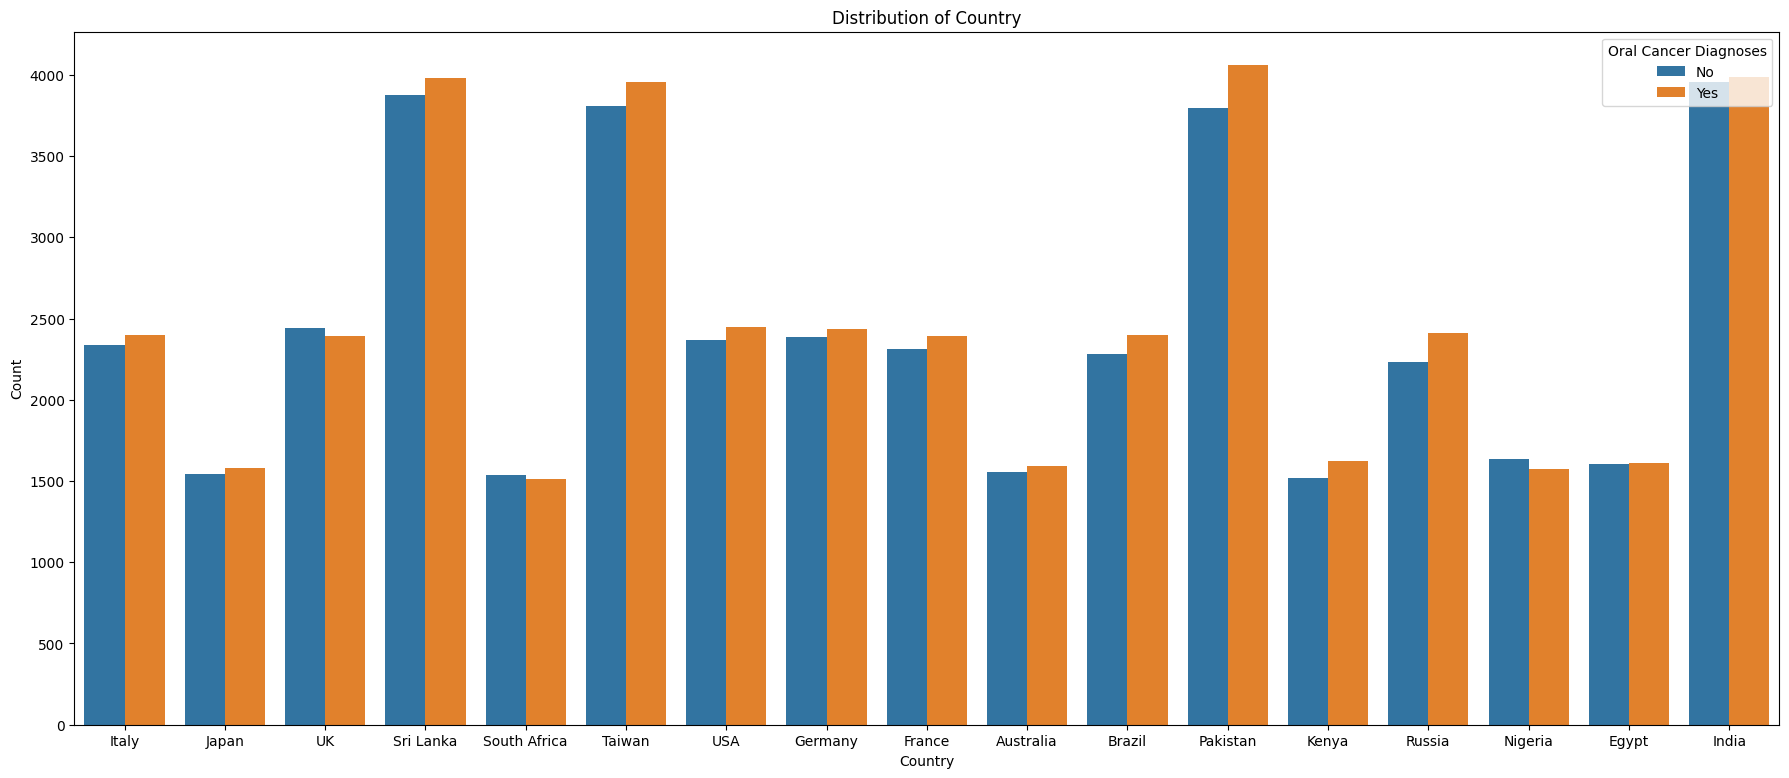

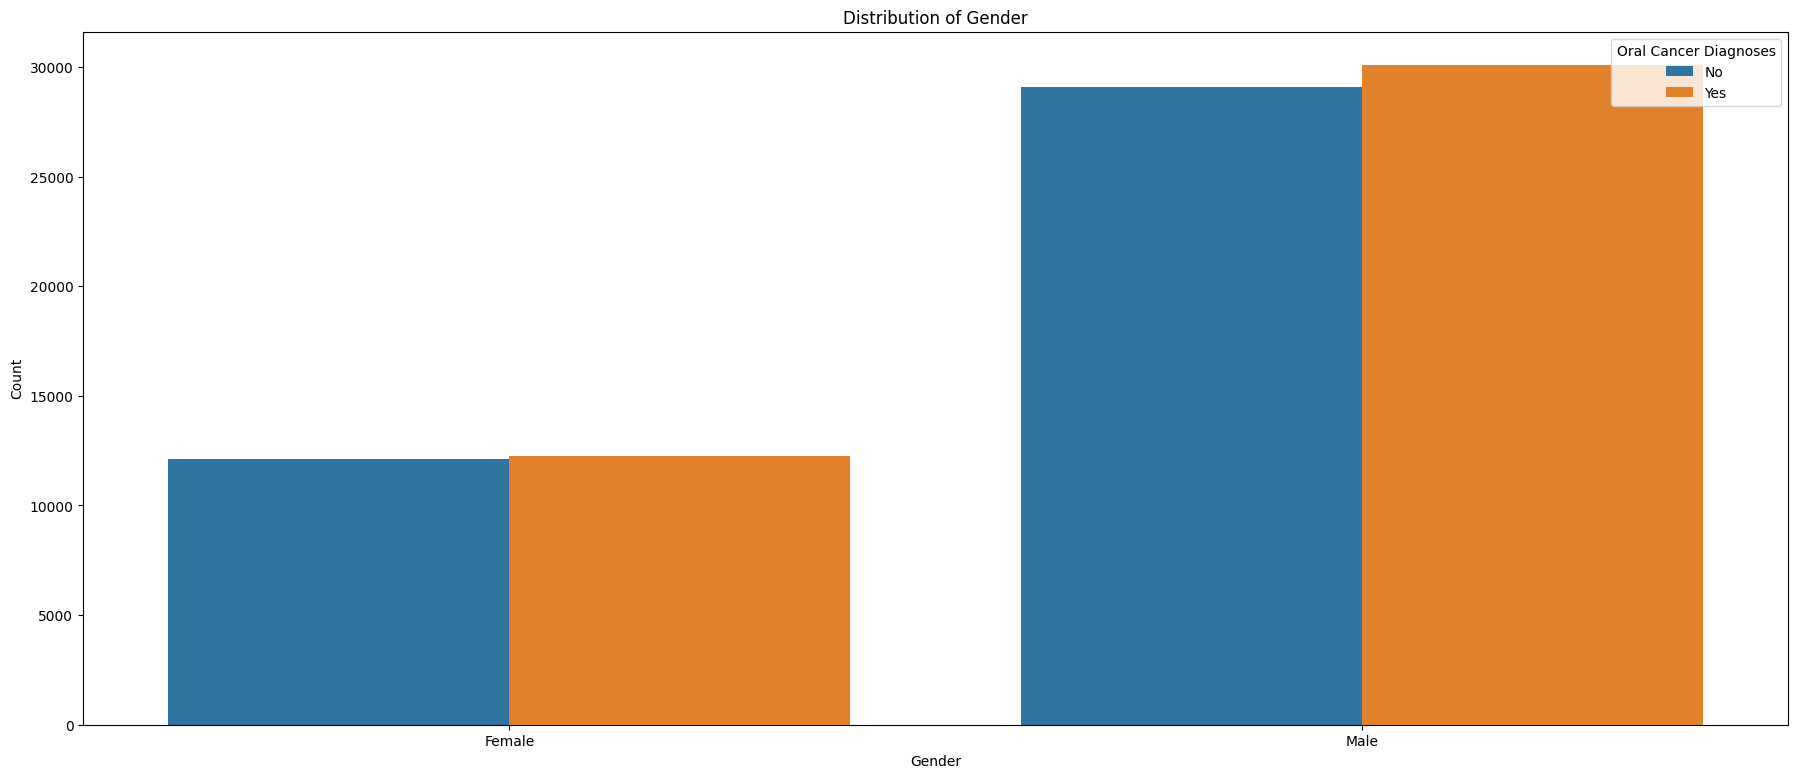

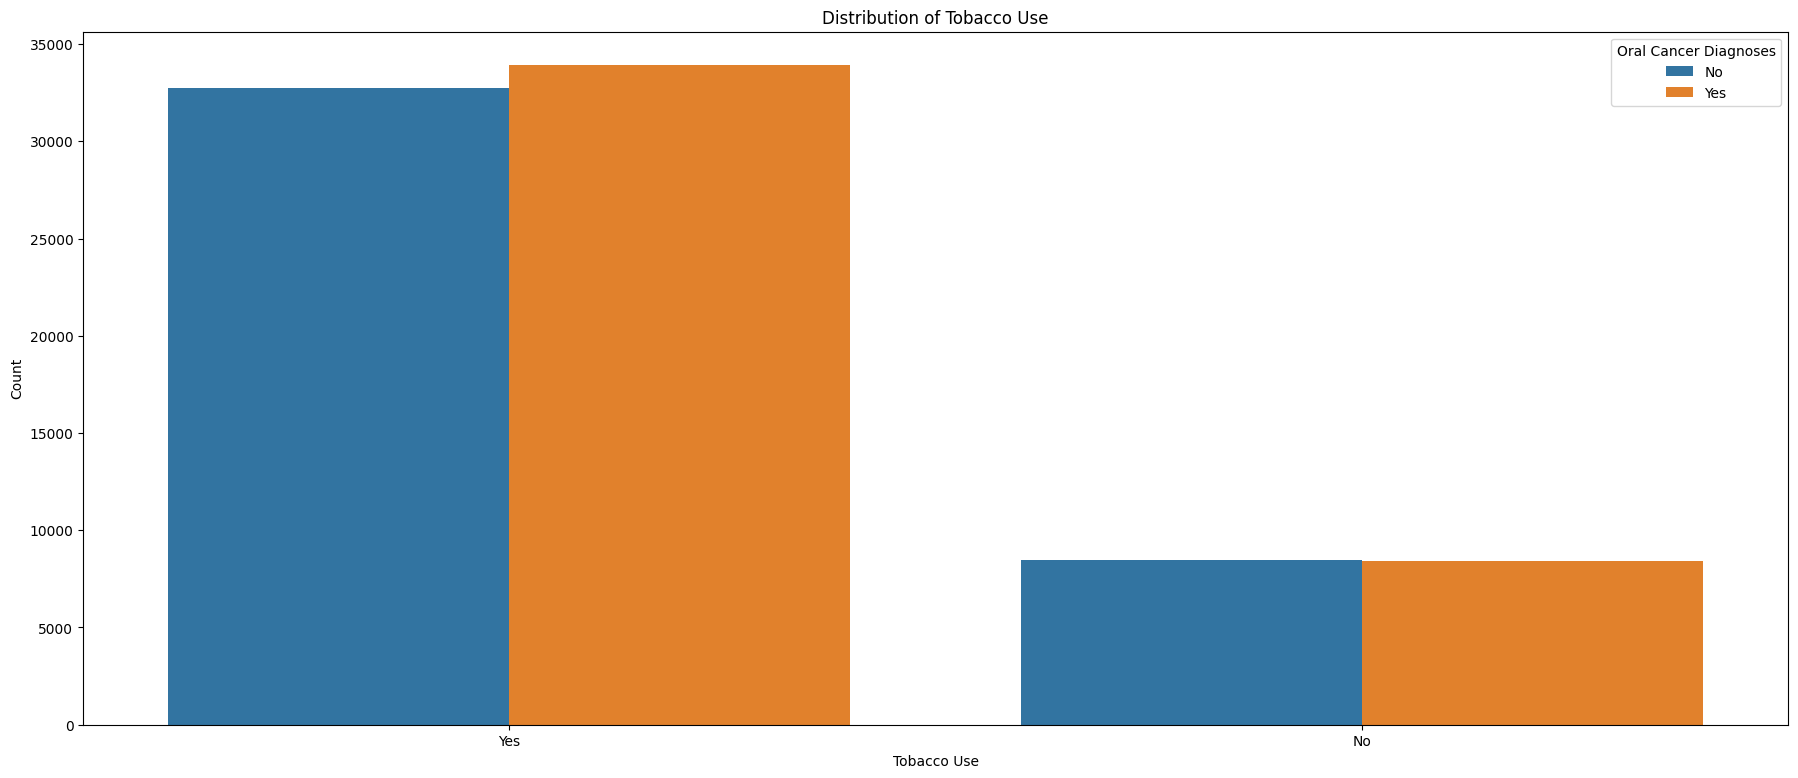

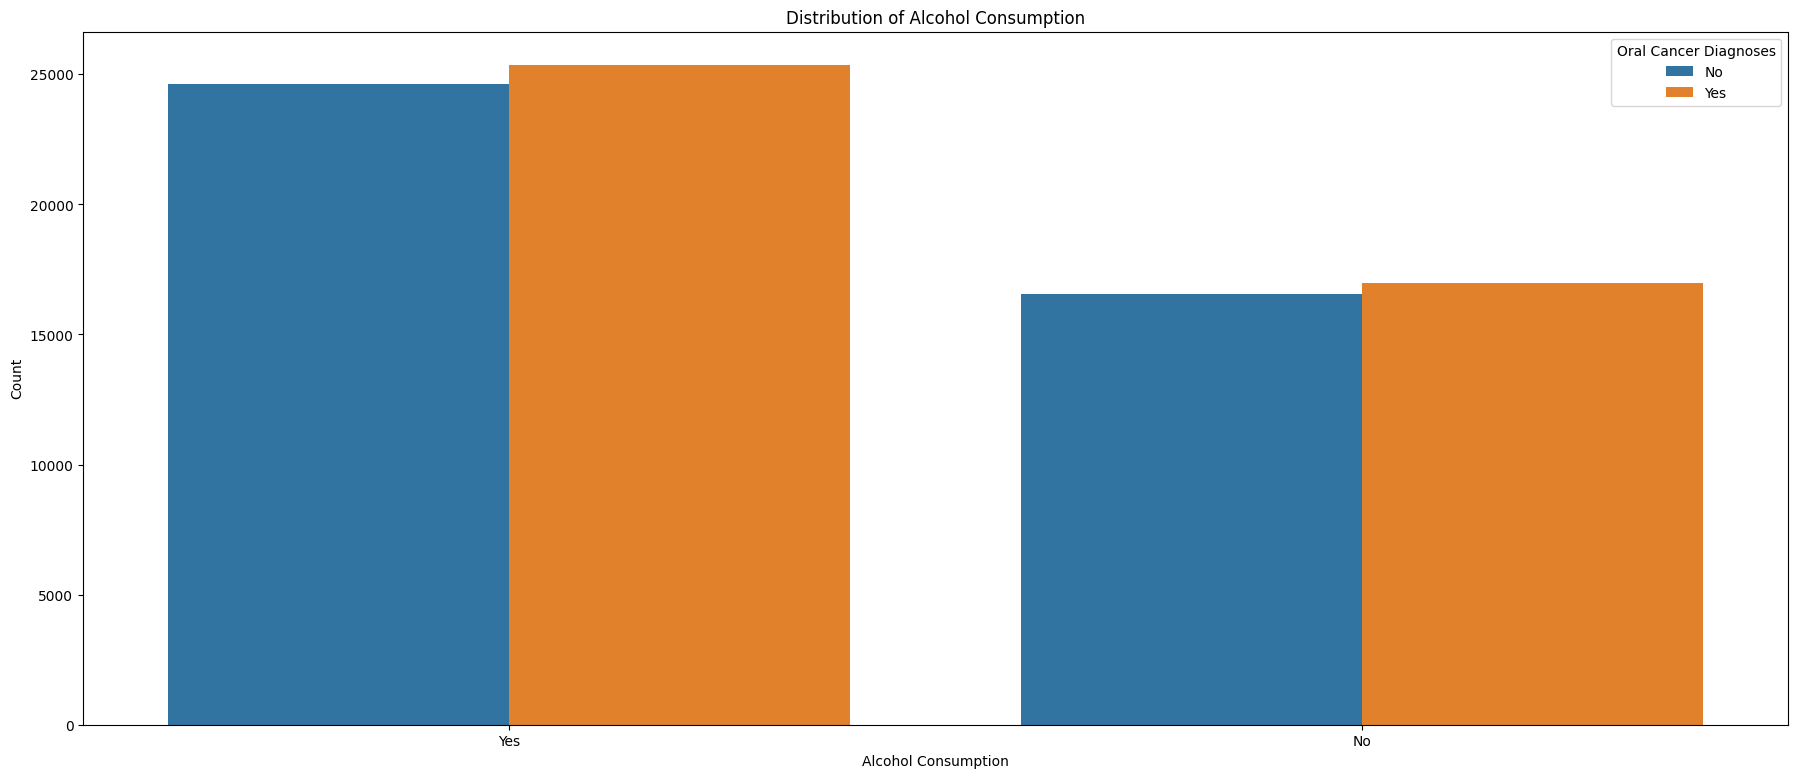

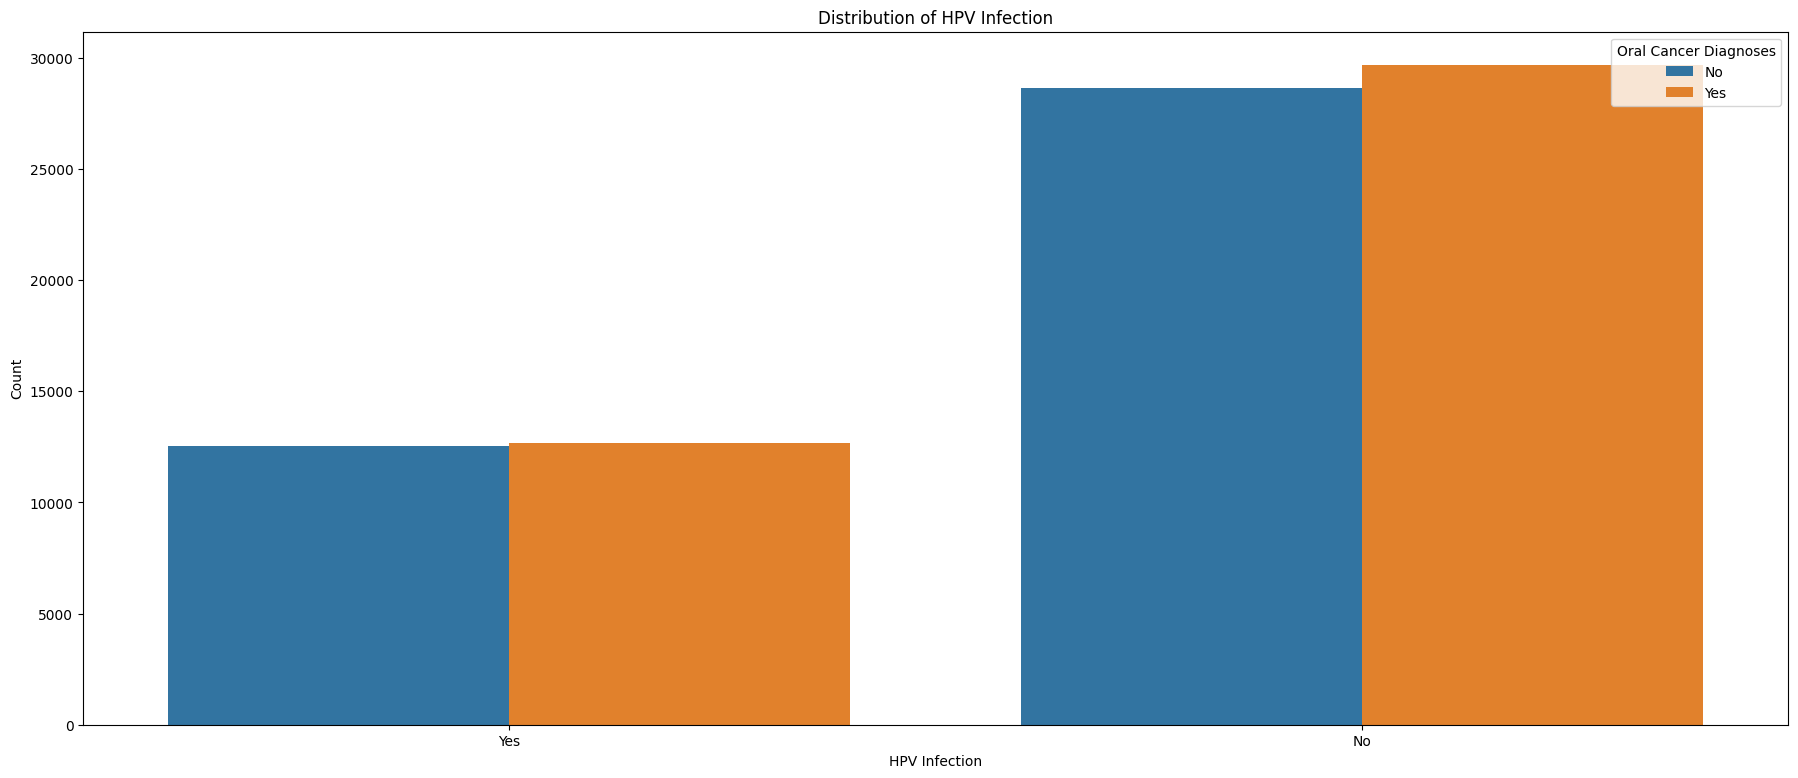

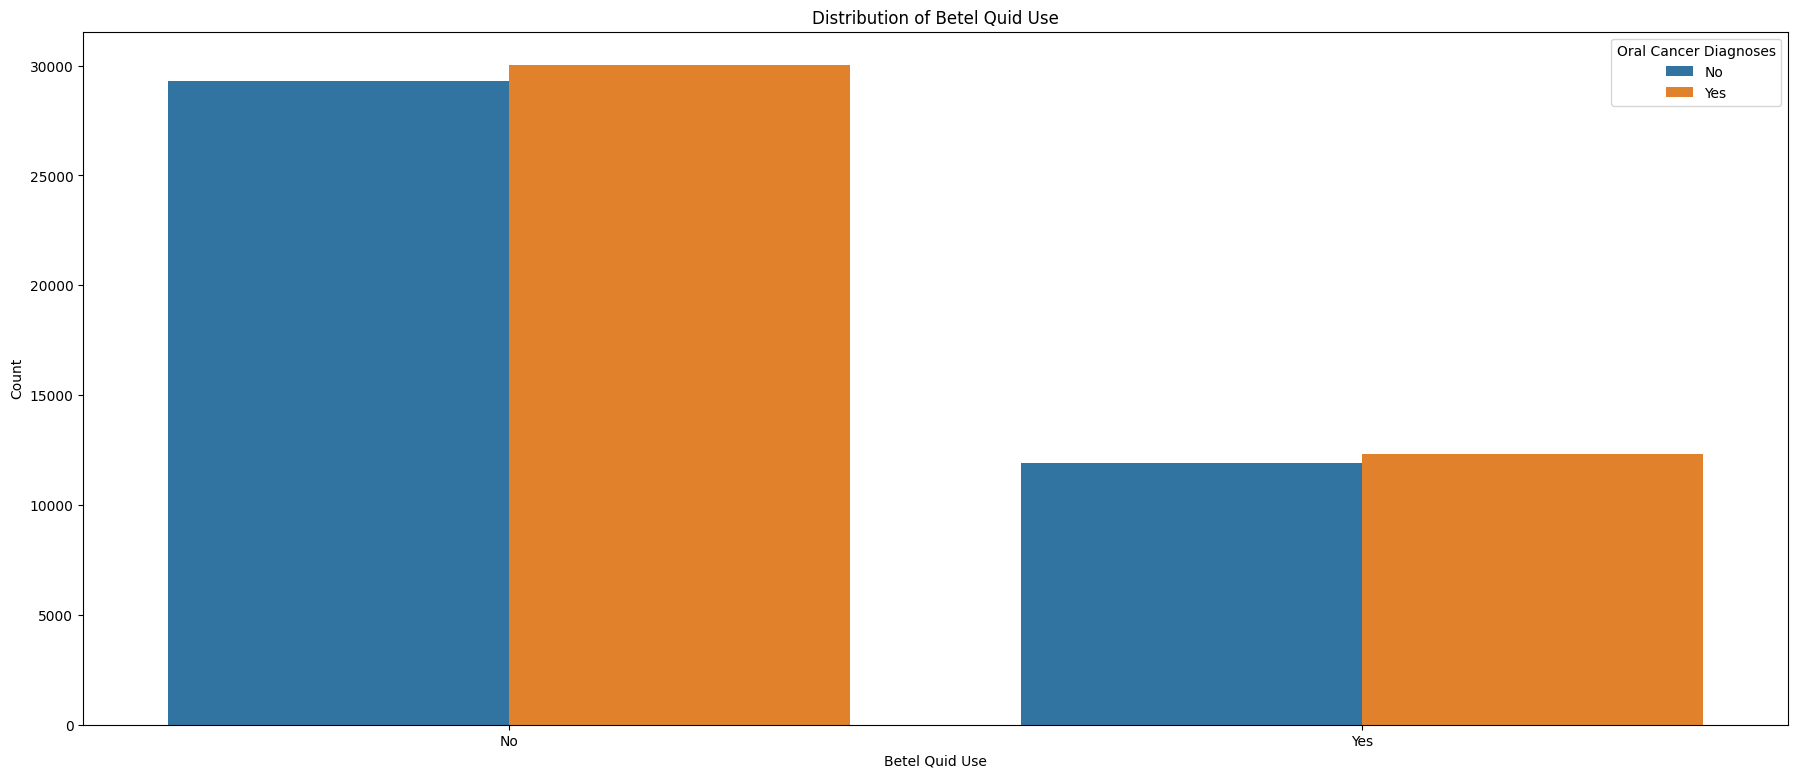

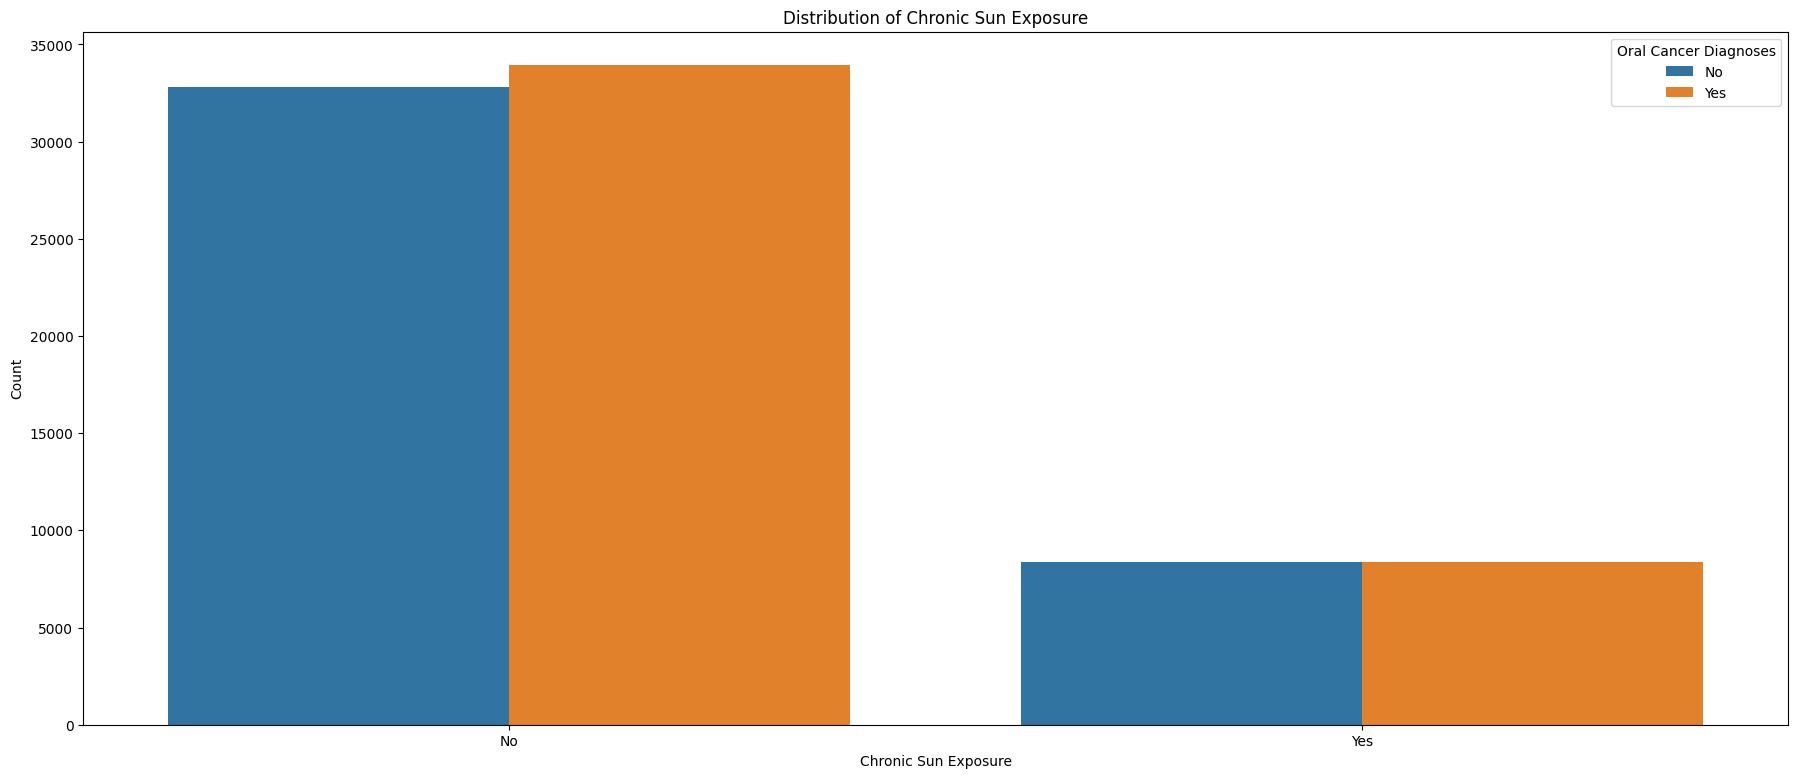

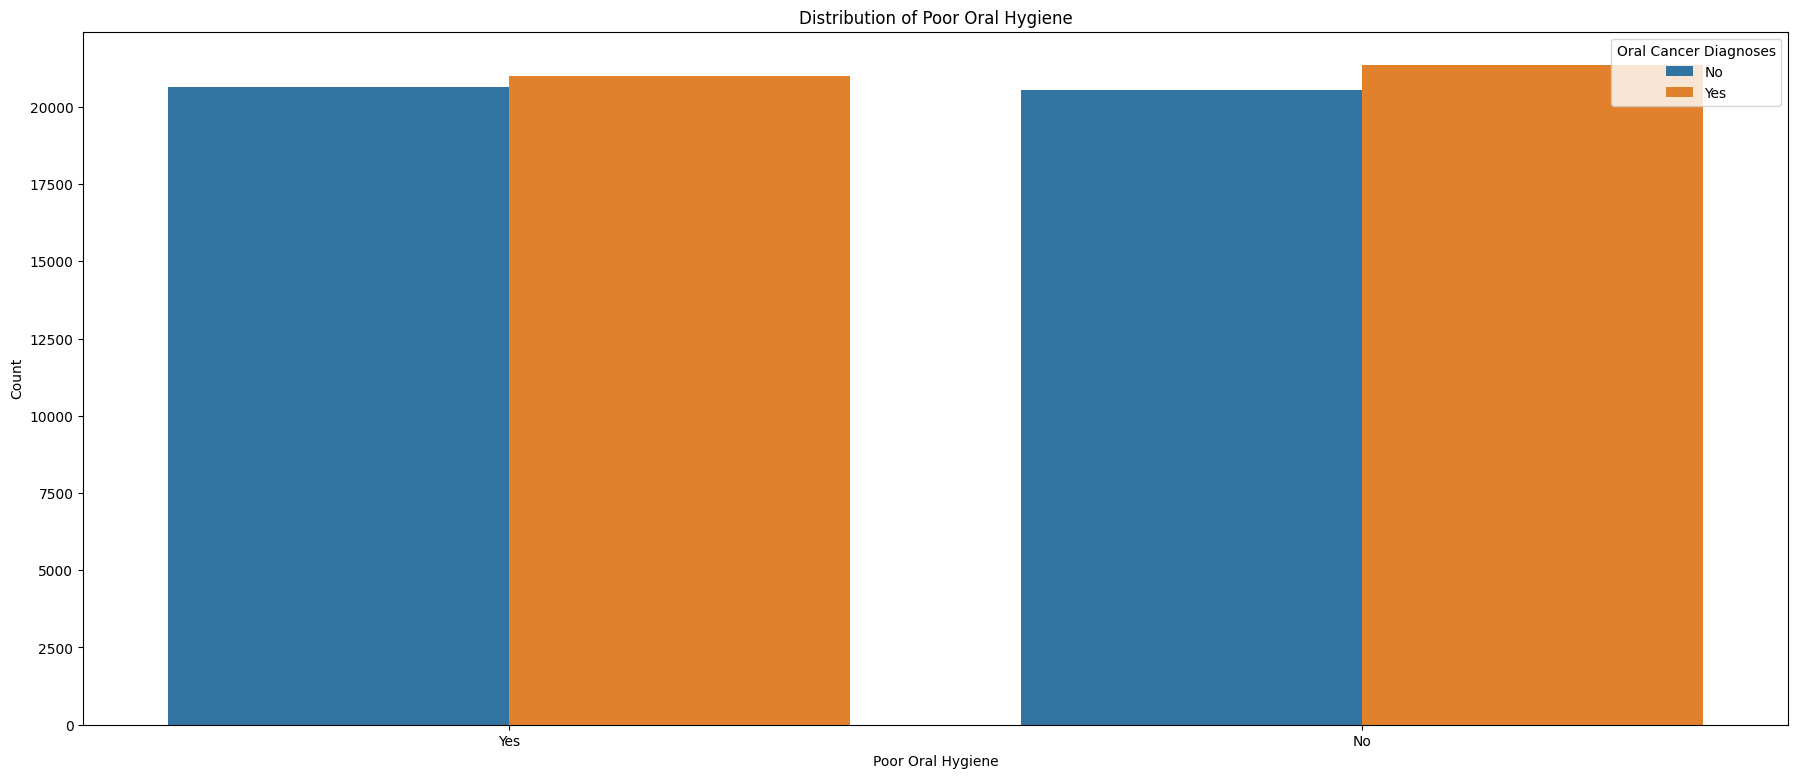

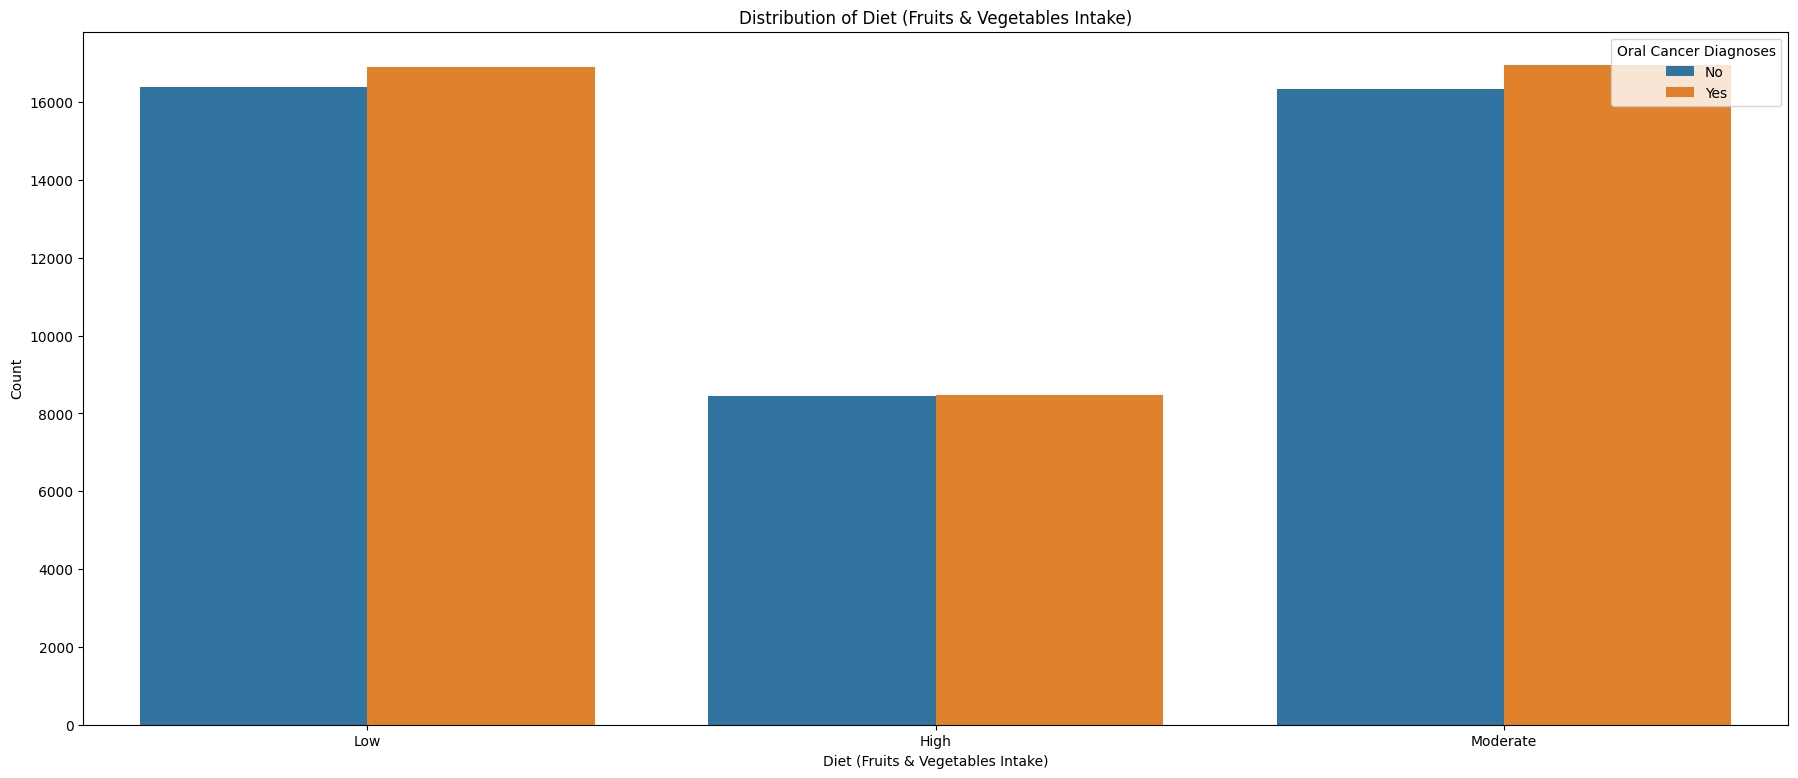

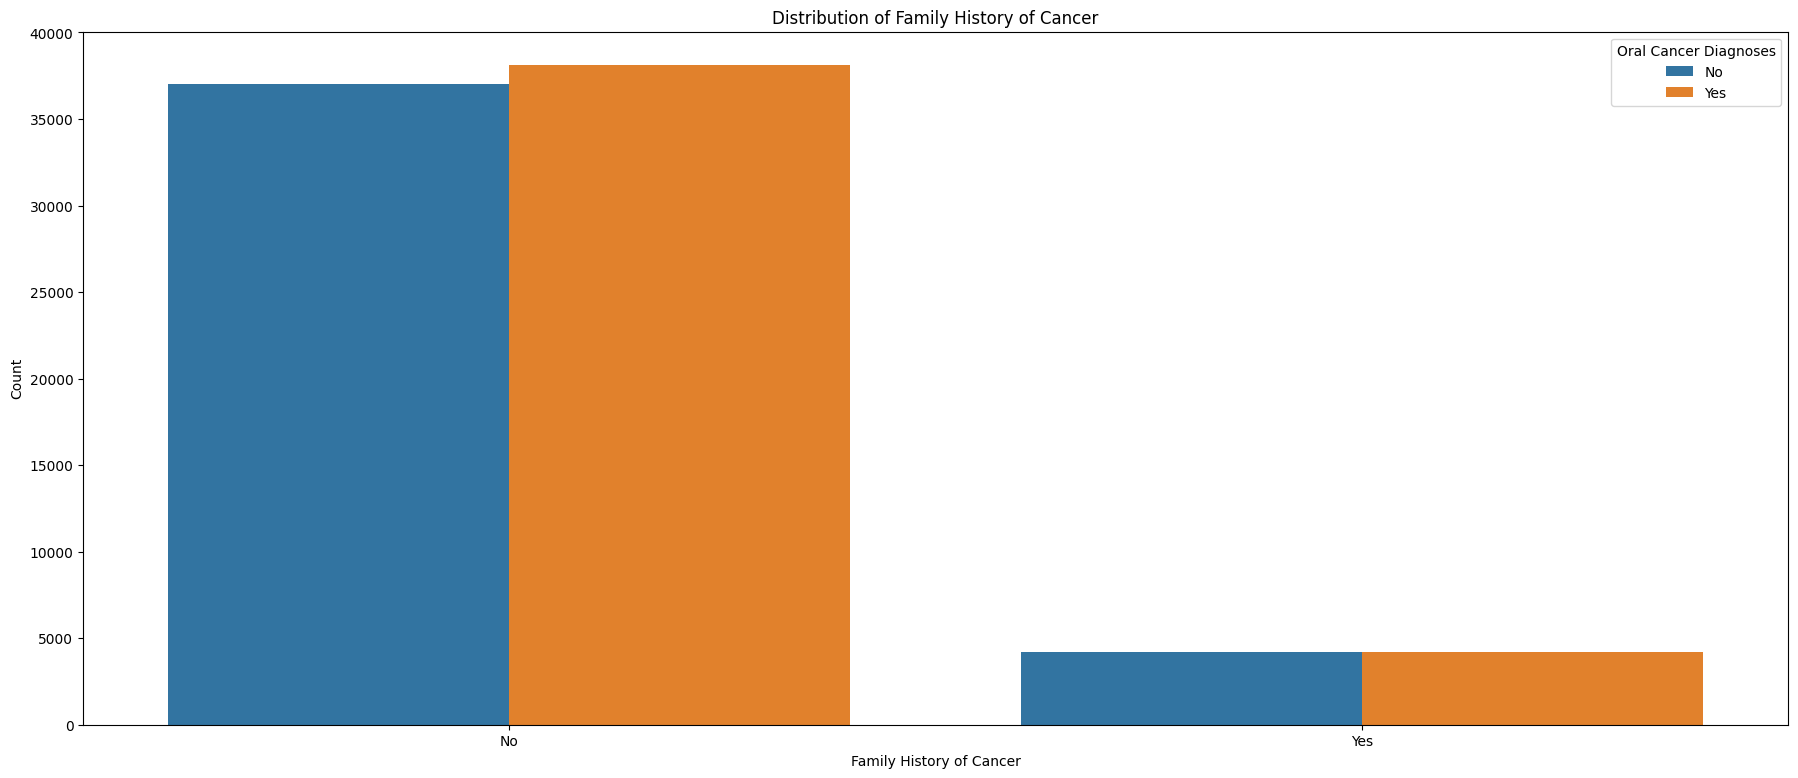

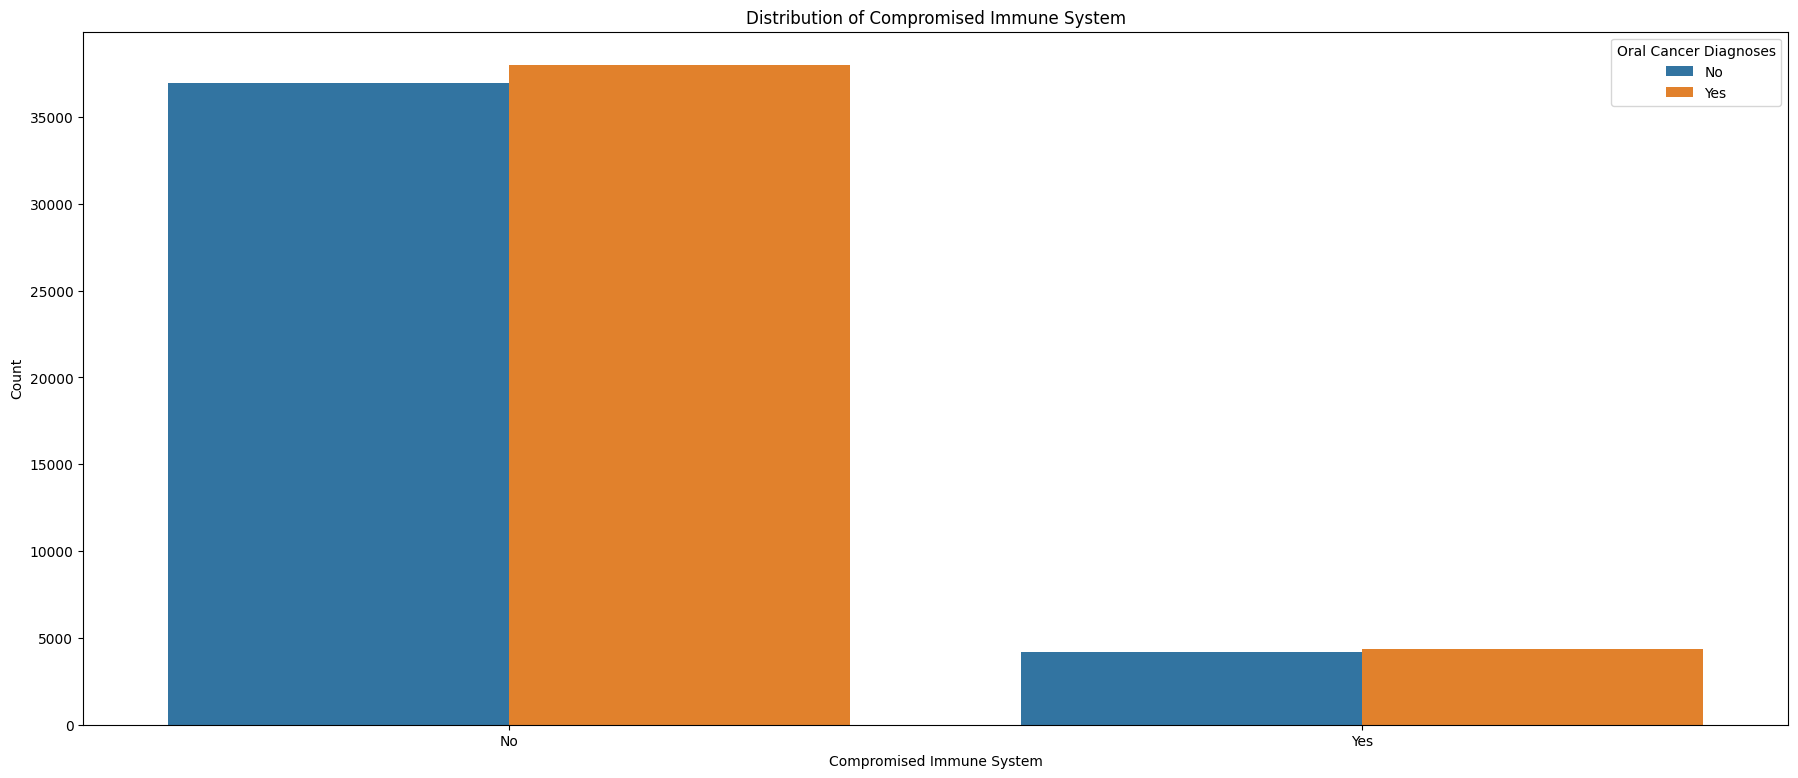

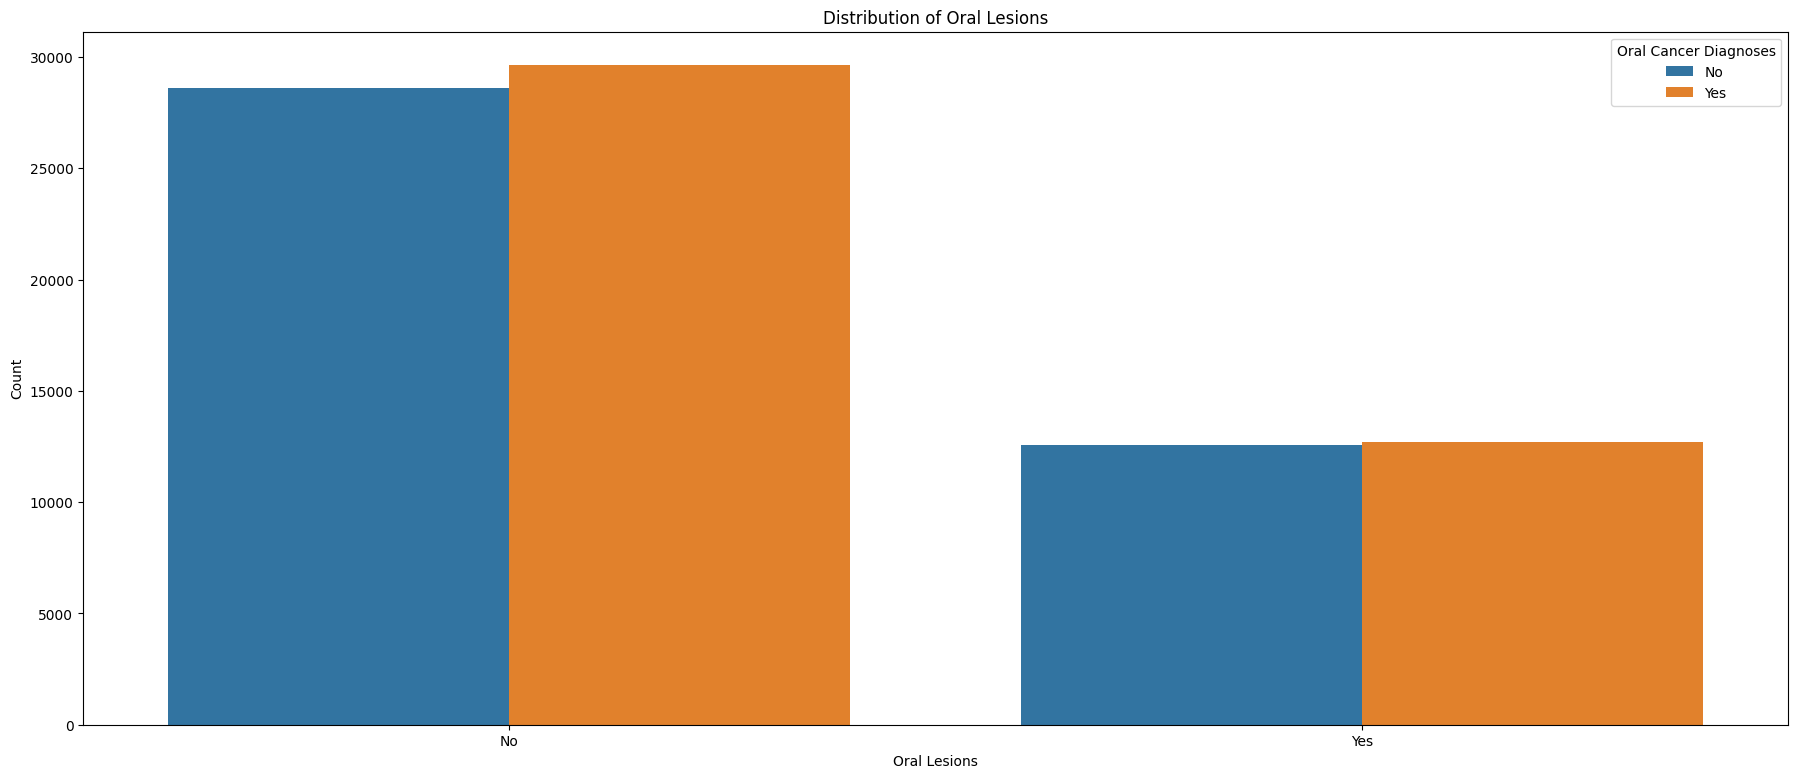

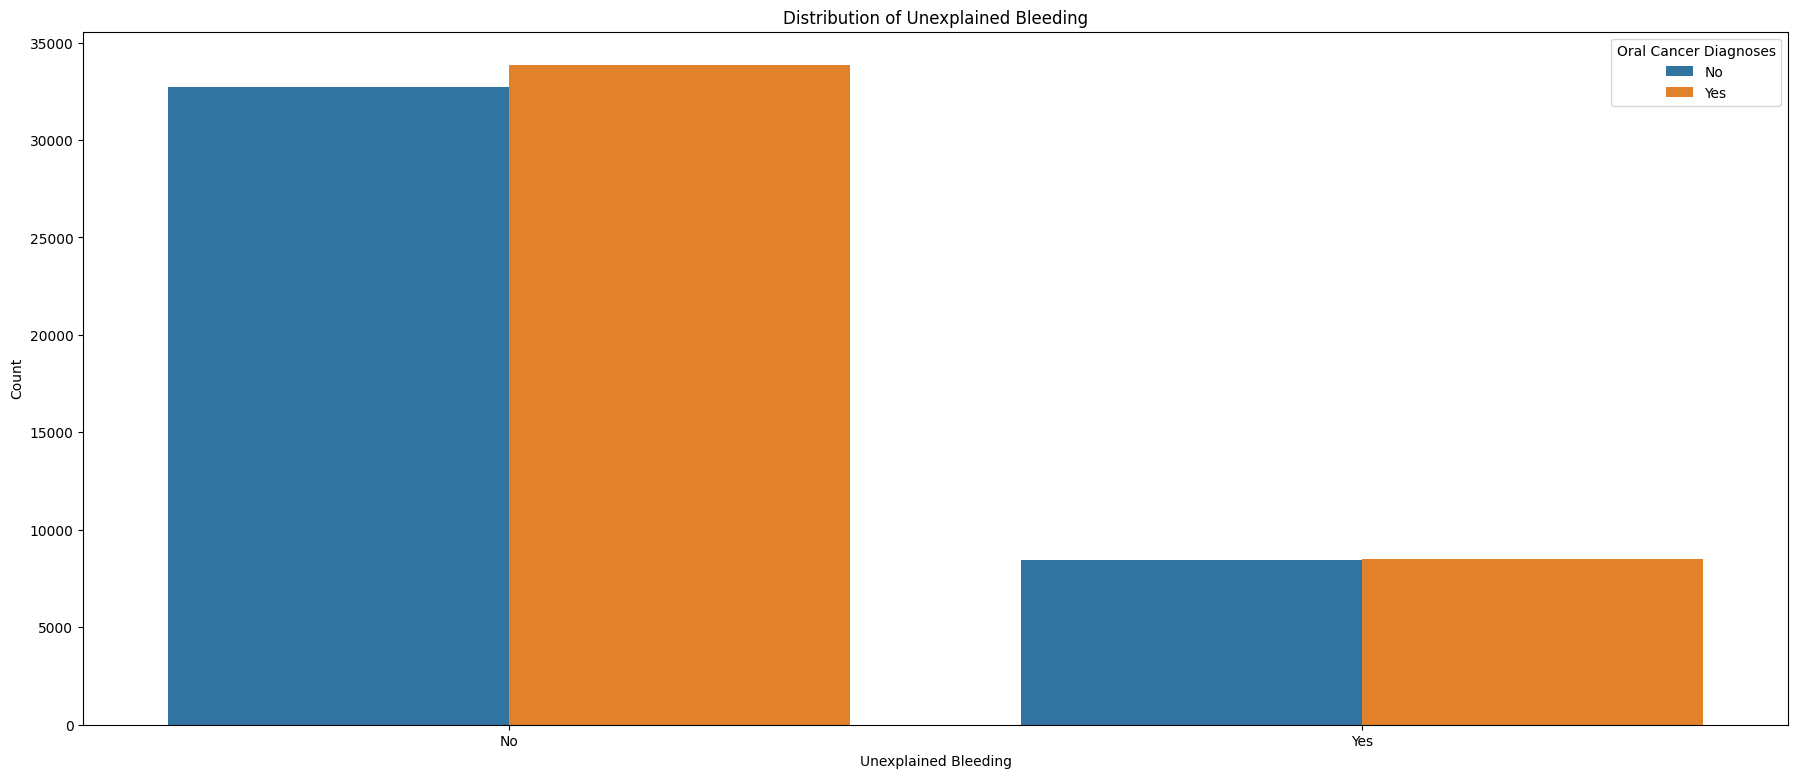

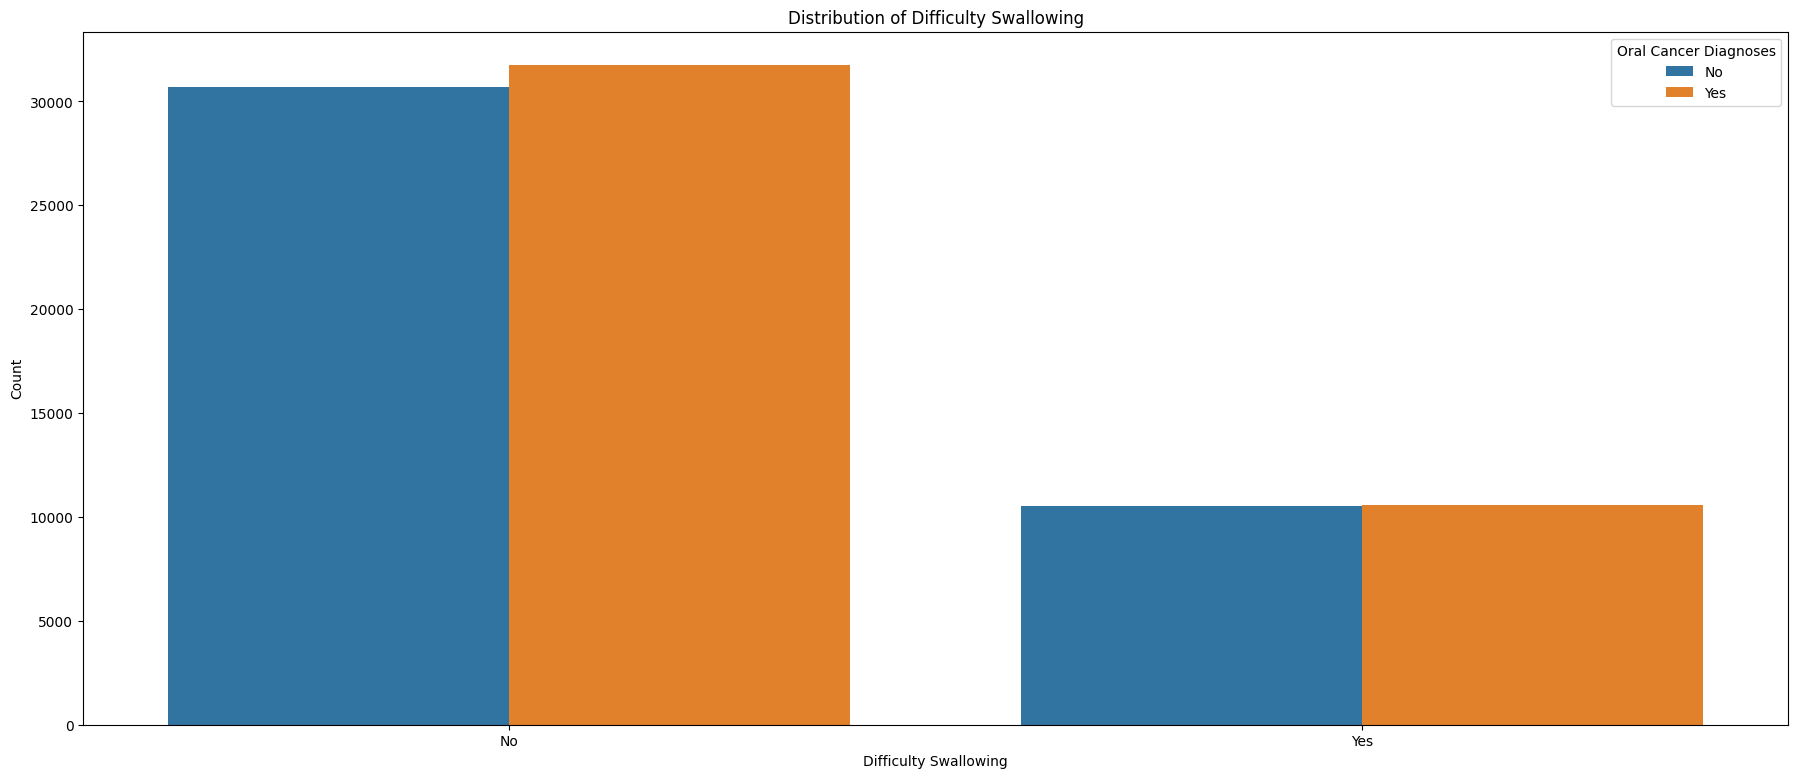

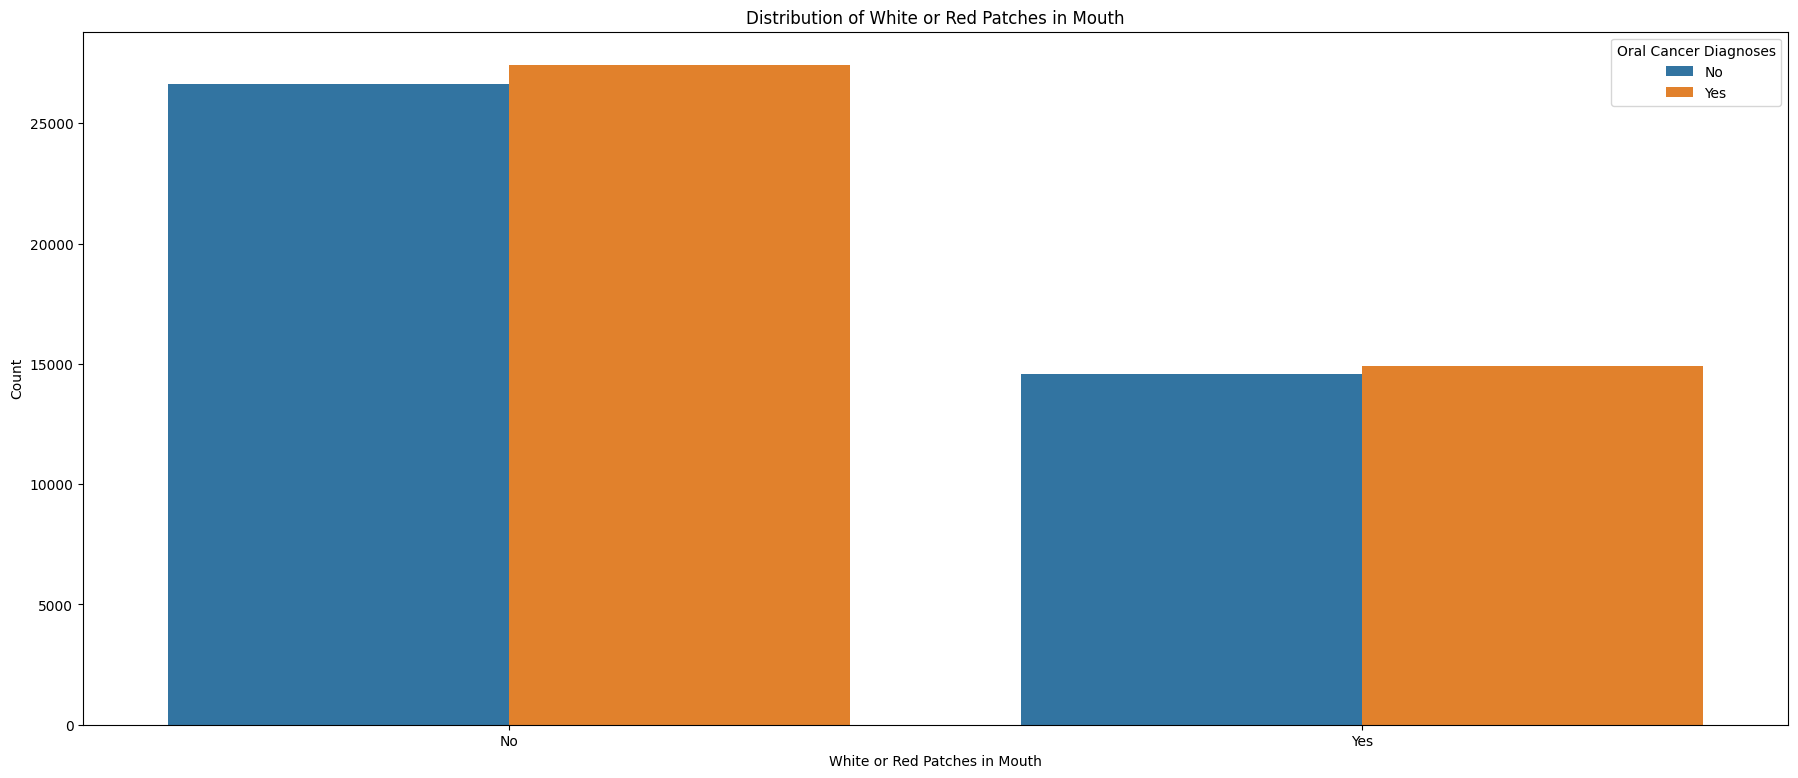

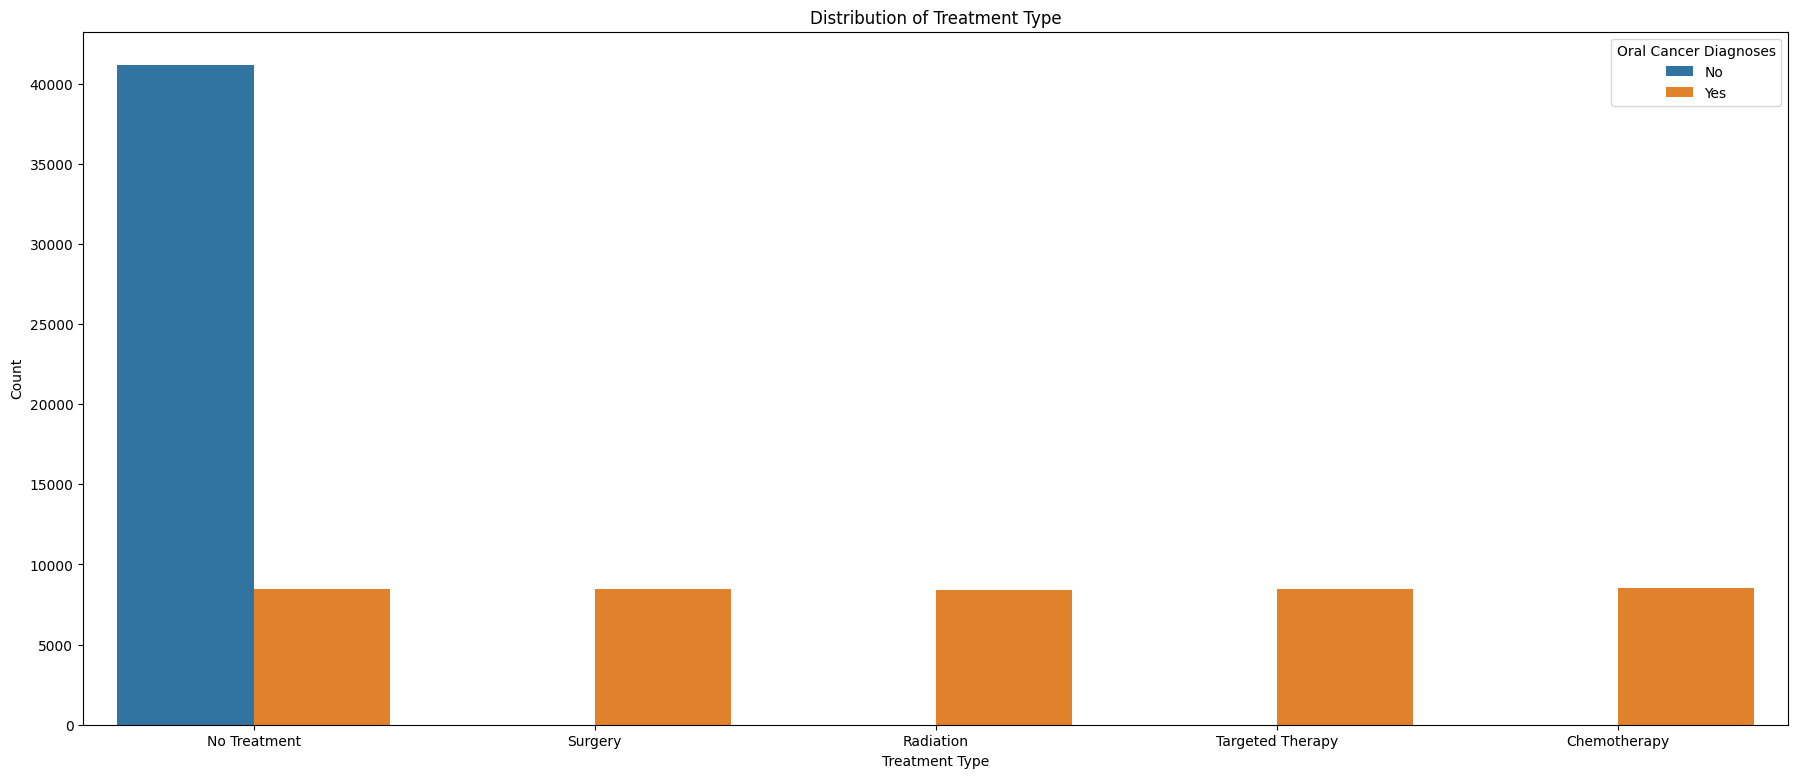

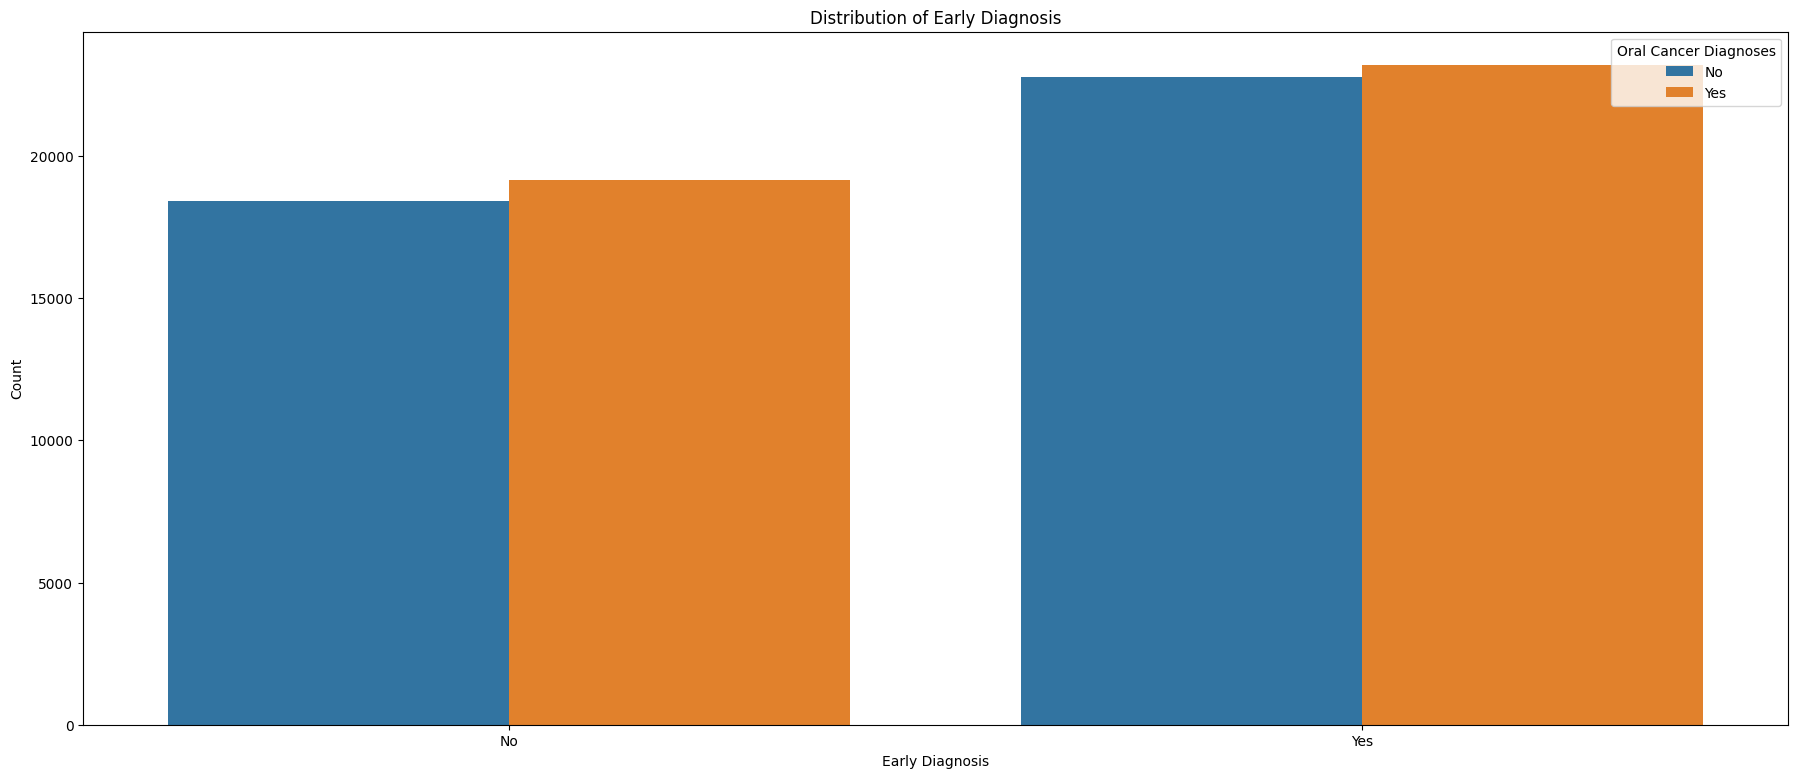

In [18]:
for col in obj_cols[:-1]:
    plt.figure(figsize=(22,9))
    sns.countplot(data=df,x=col,hue='Oral Cancer (Diagnosis)')
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.legend(title='Oral Cancer Diagnoses', labels=['No', 'Yes'], loc='upper right')
    plt.show()

In [19]:
# num_cols=df.select_dtypes(include=['number']).columns
num_cols = df[df['Oral Cancer (Diagnosis)'] == "Yes"].select_dtypes(include=['number']).columns
num_cols

Index(['Age', 'Tumor Size (cm)', 'Cancer Stage', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)'],
      dtype='object')

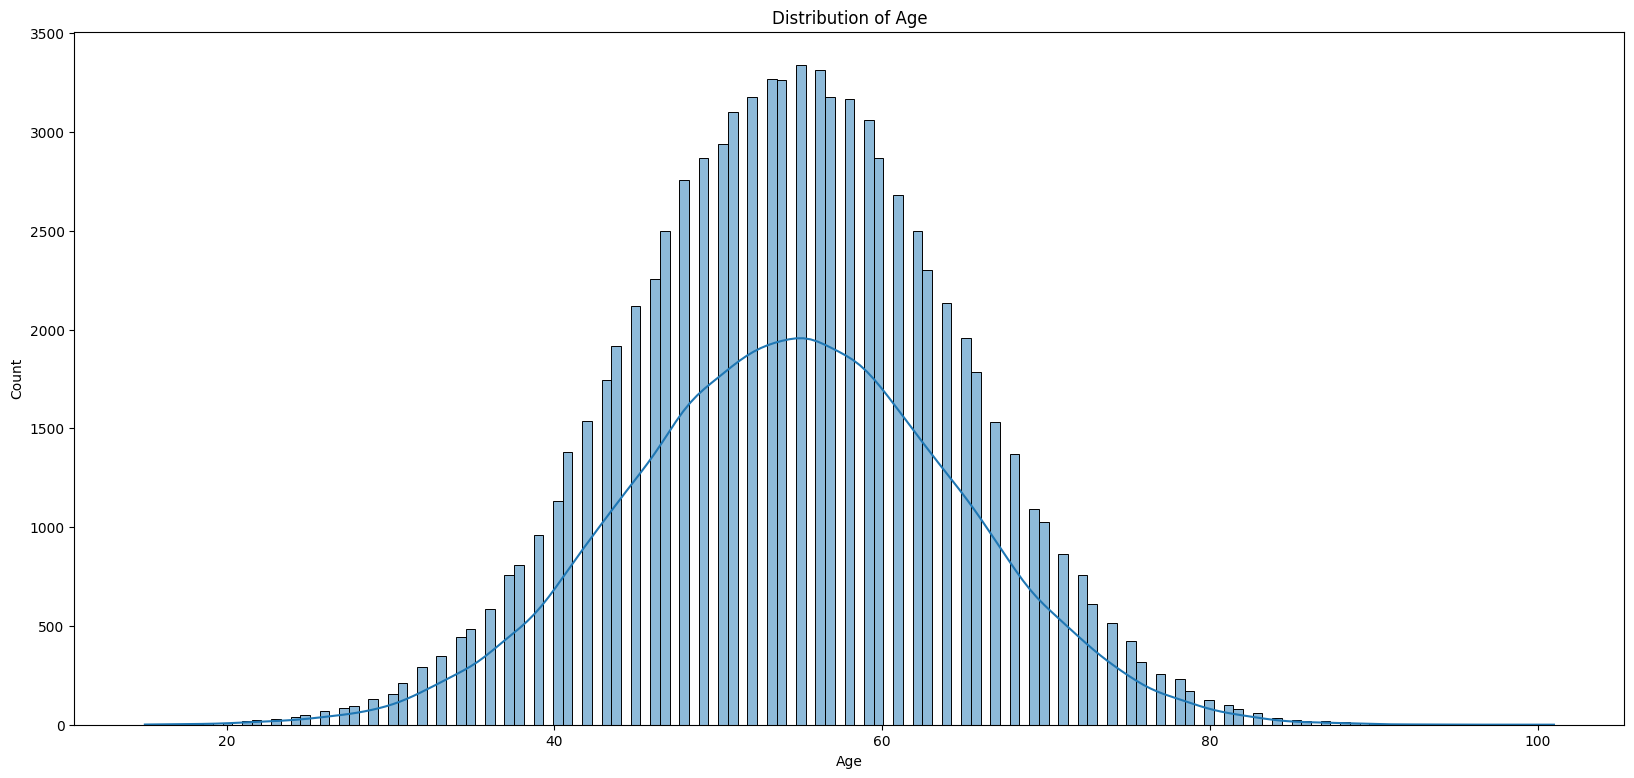

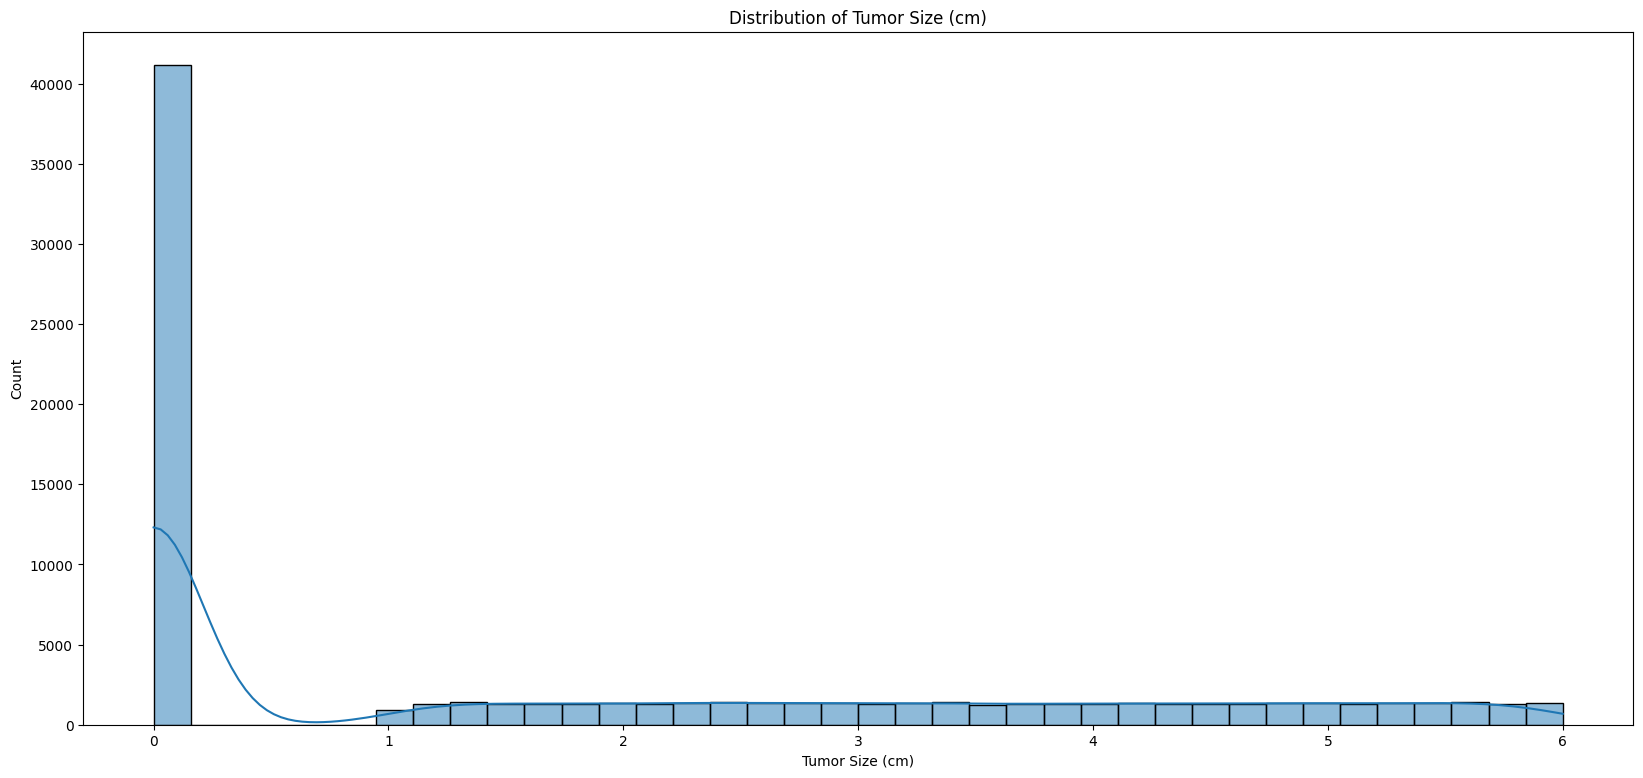

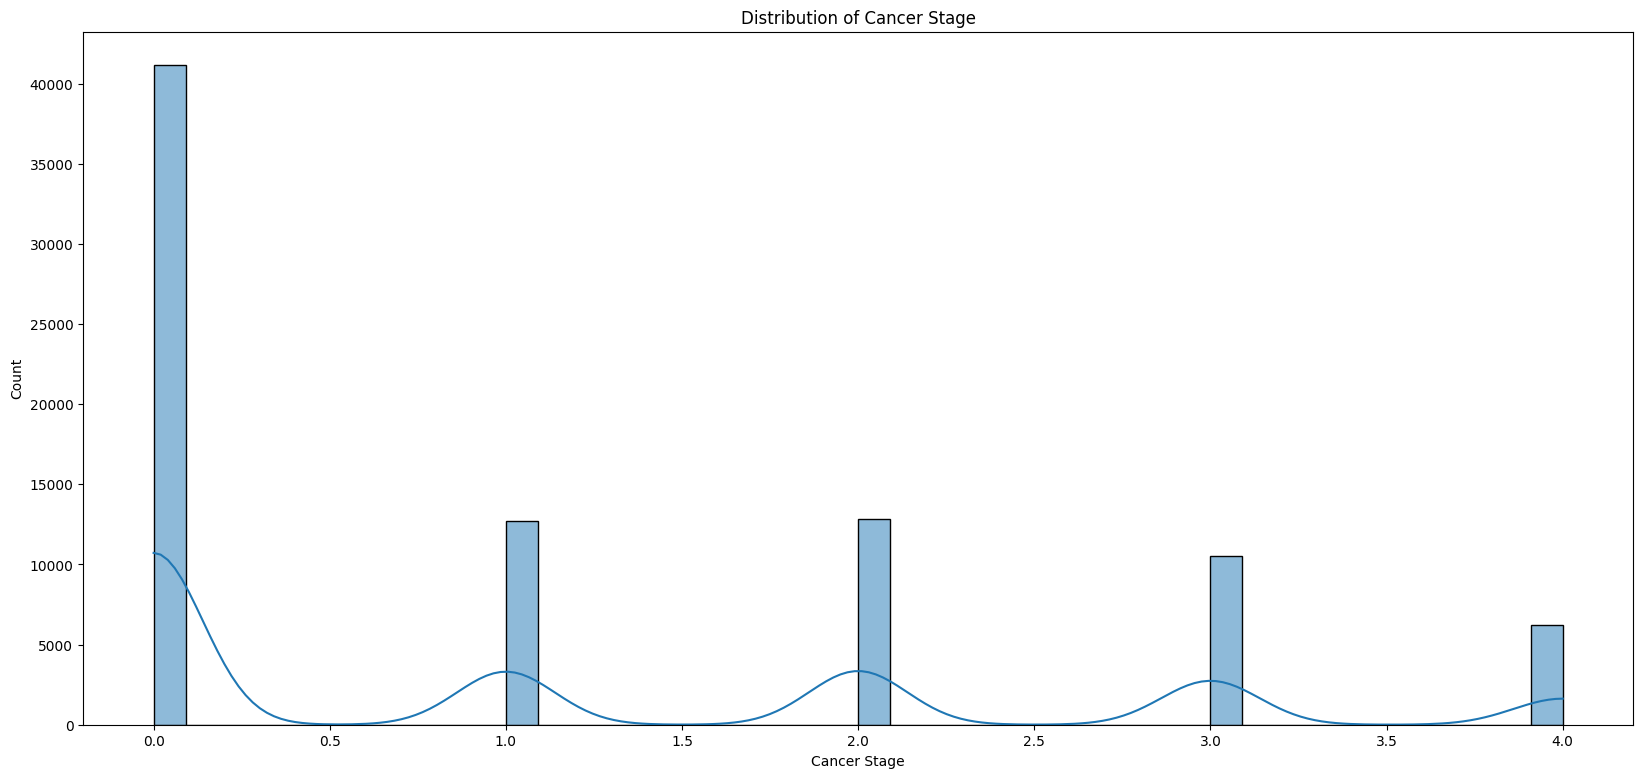

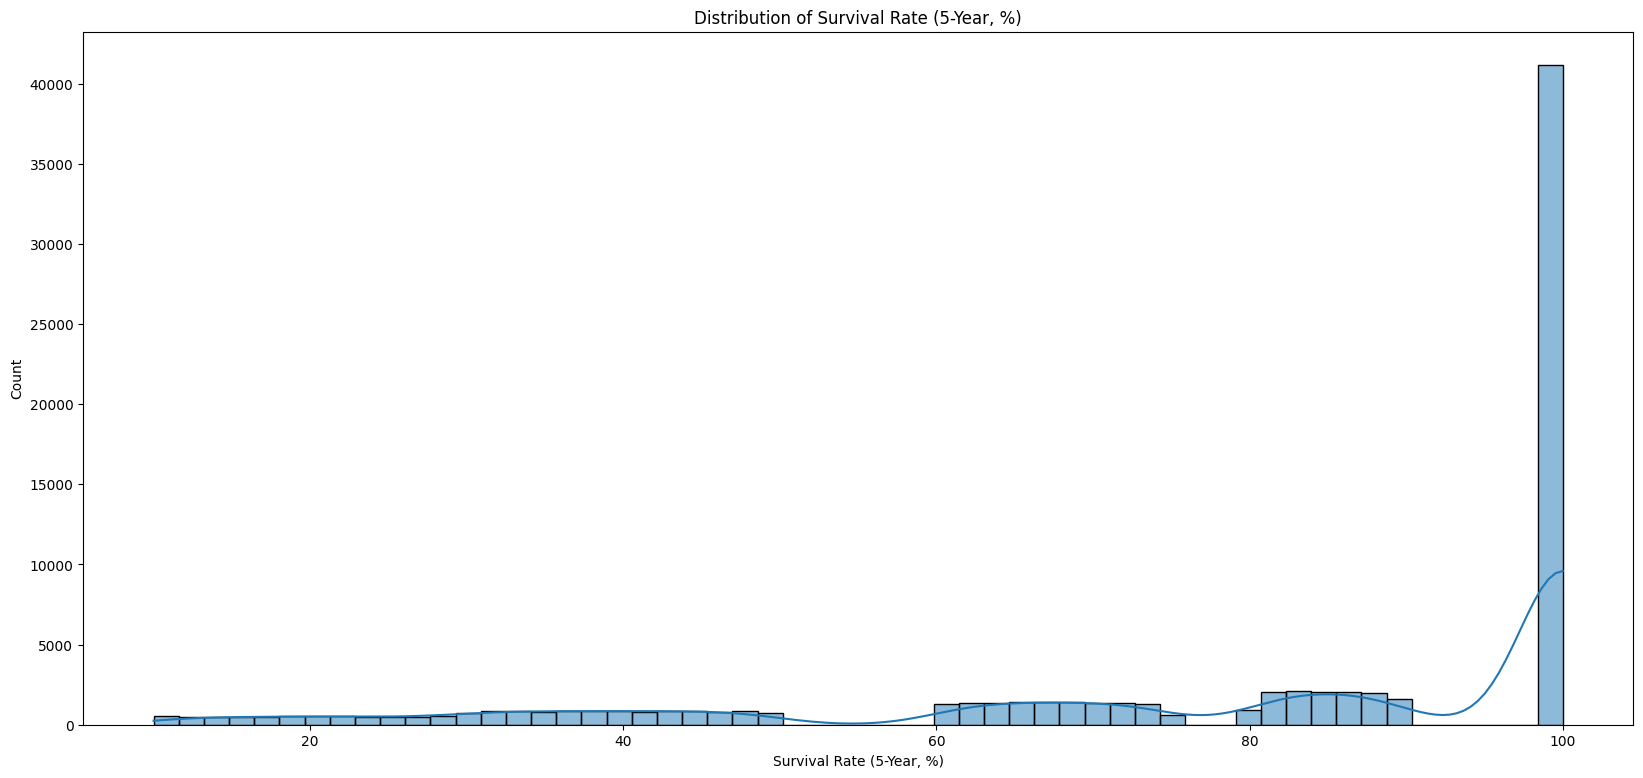

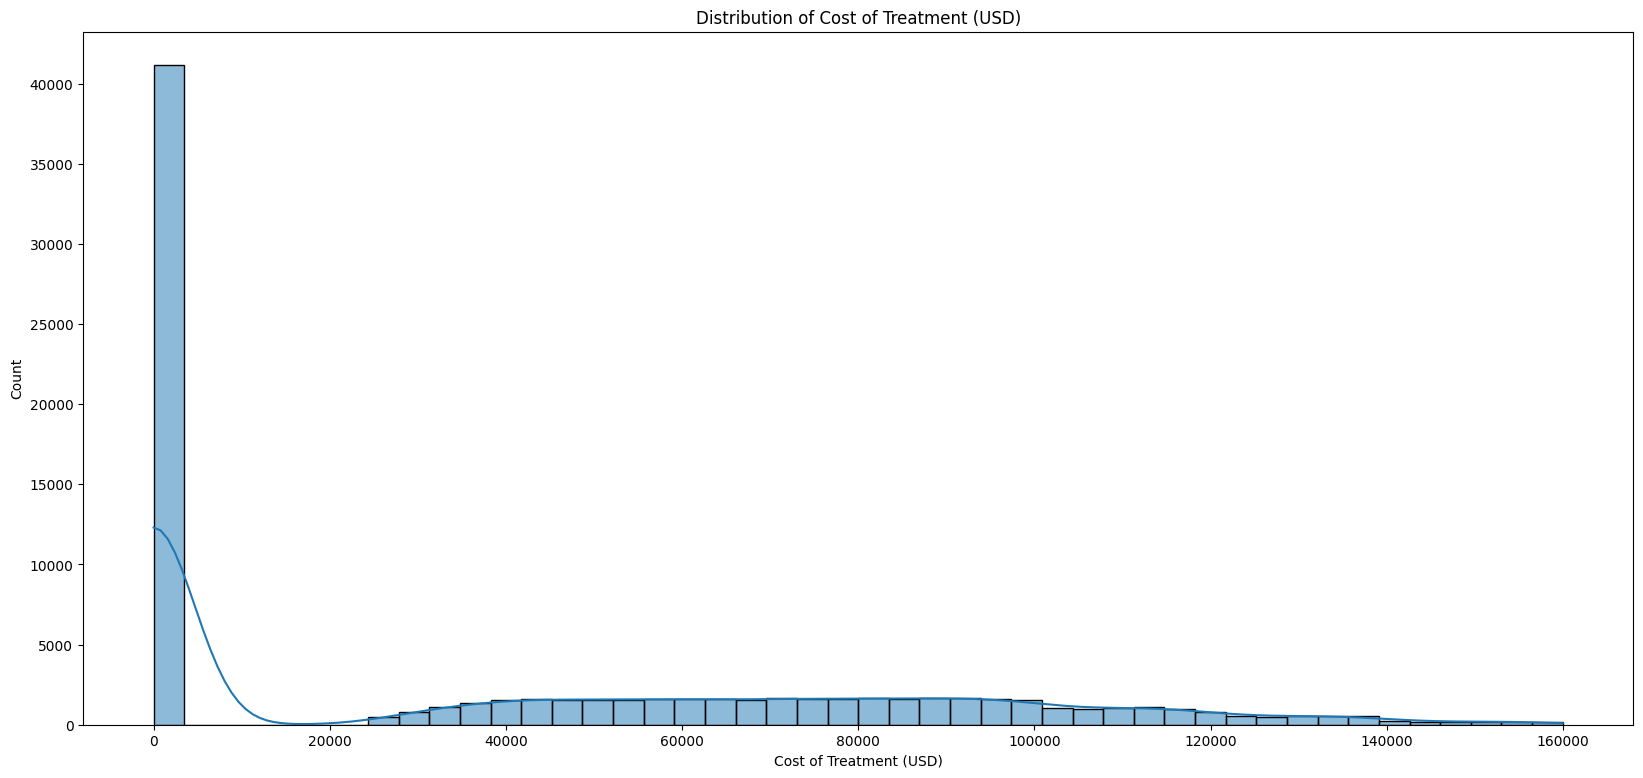

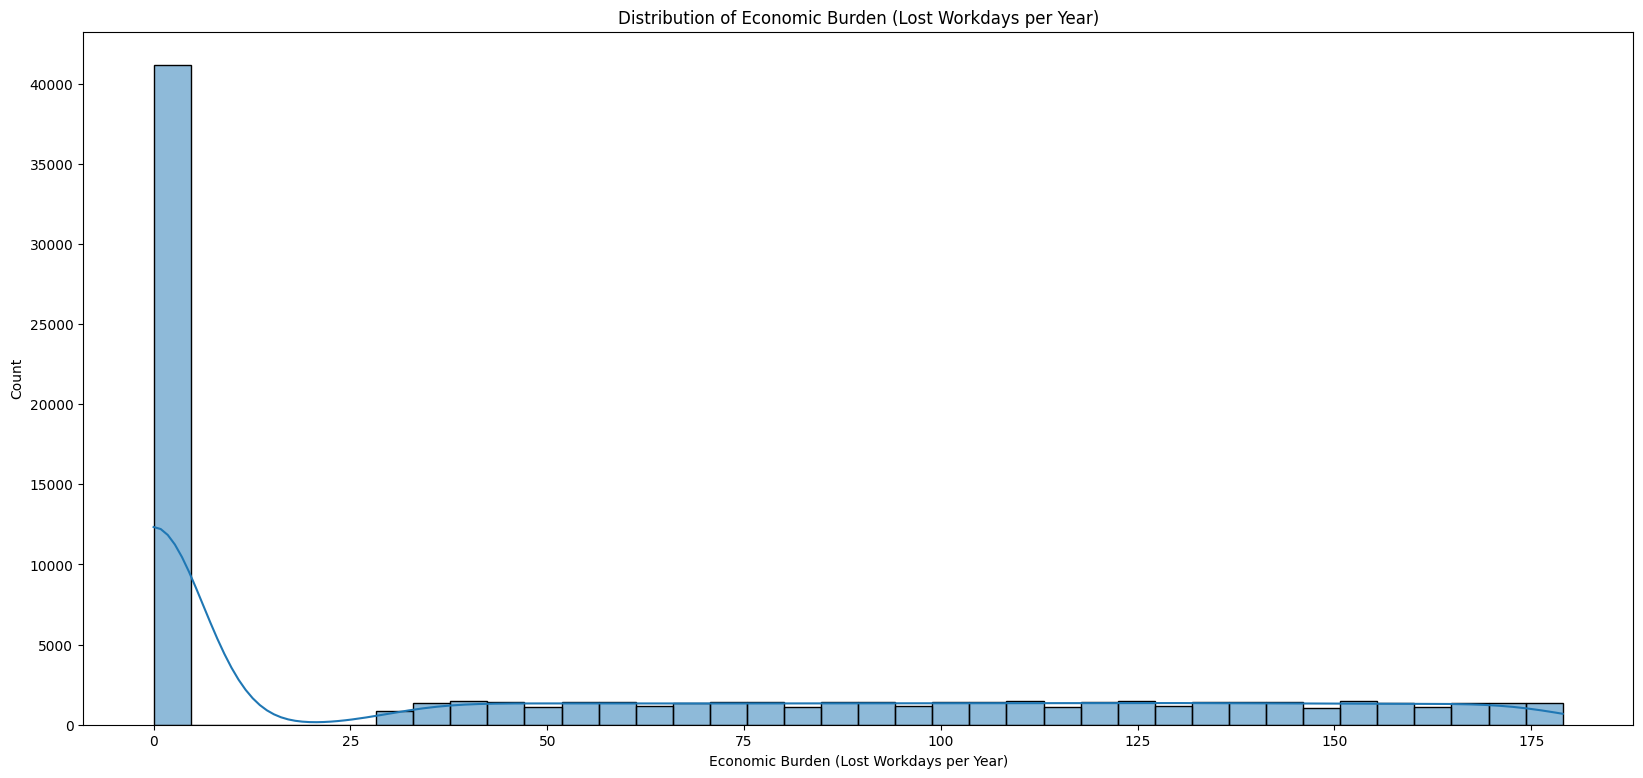

In [20]:
for col in num_cols:
    plt.figure(figsize=(20,9))
    sns.histplot(data=df,x=col,kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

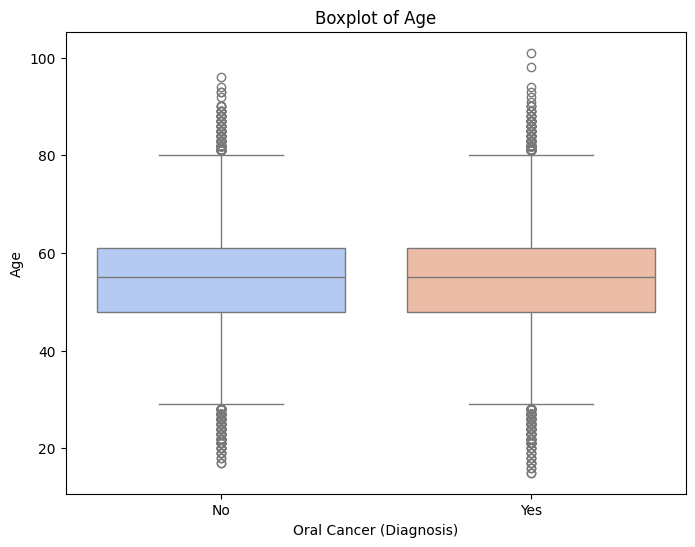

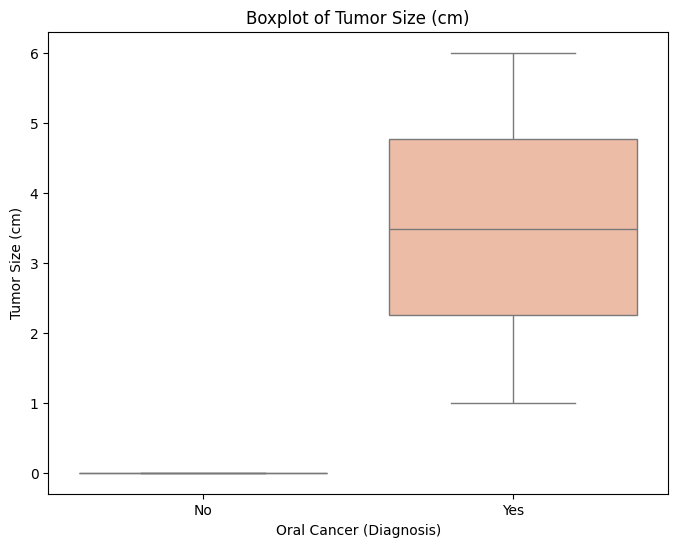

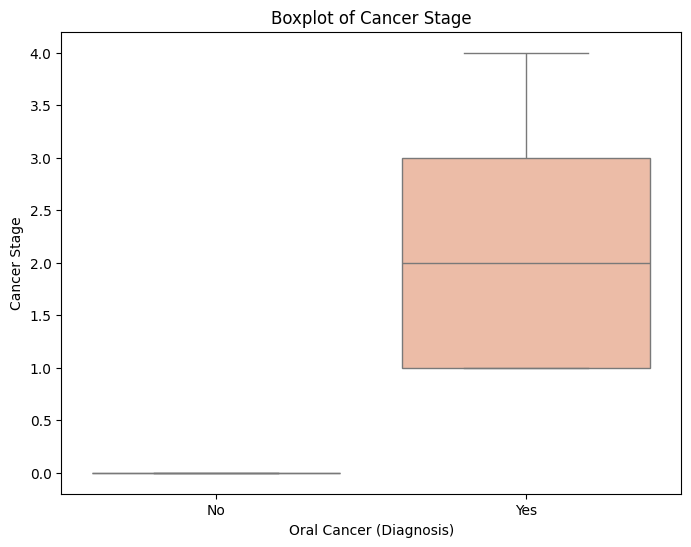

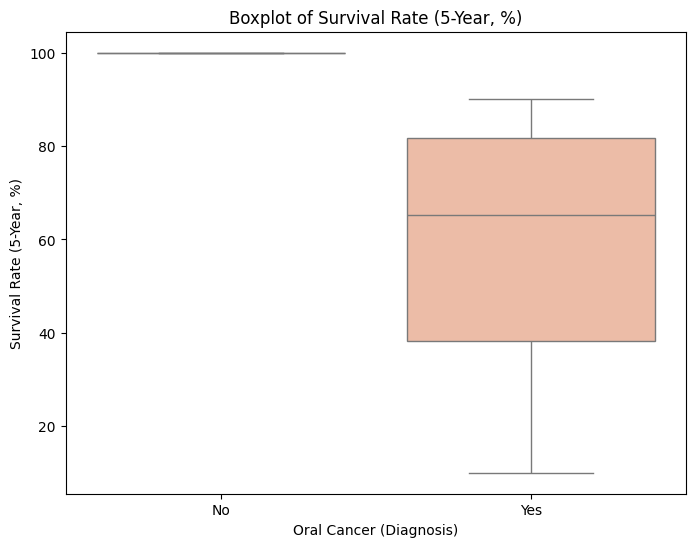

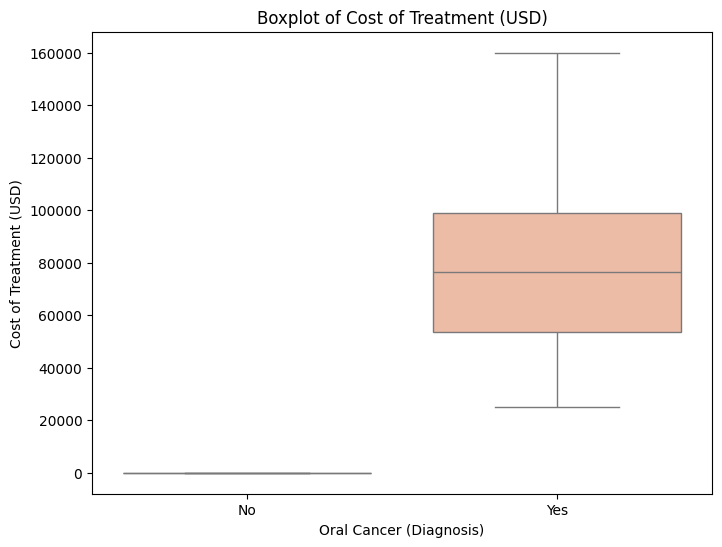

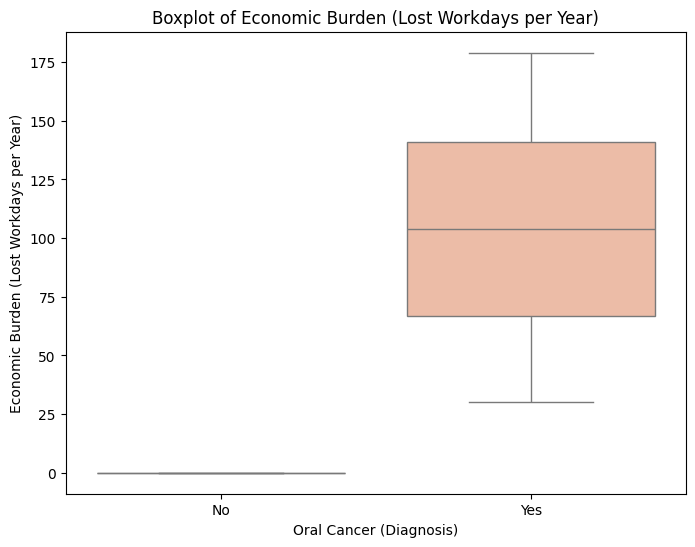

In [21]:
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df,x='Oral Cancer (Diagnosis)', y=col, palette='coolwarm',hue="Oral Cancer (Diagnosis)")
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

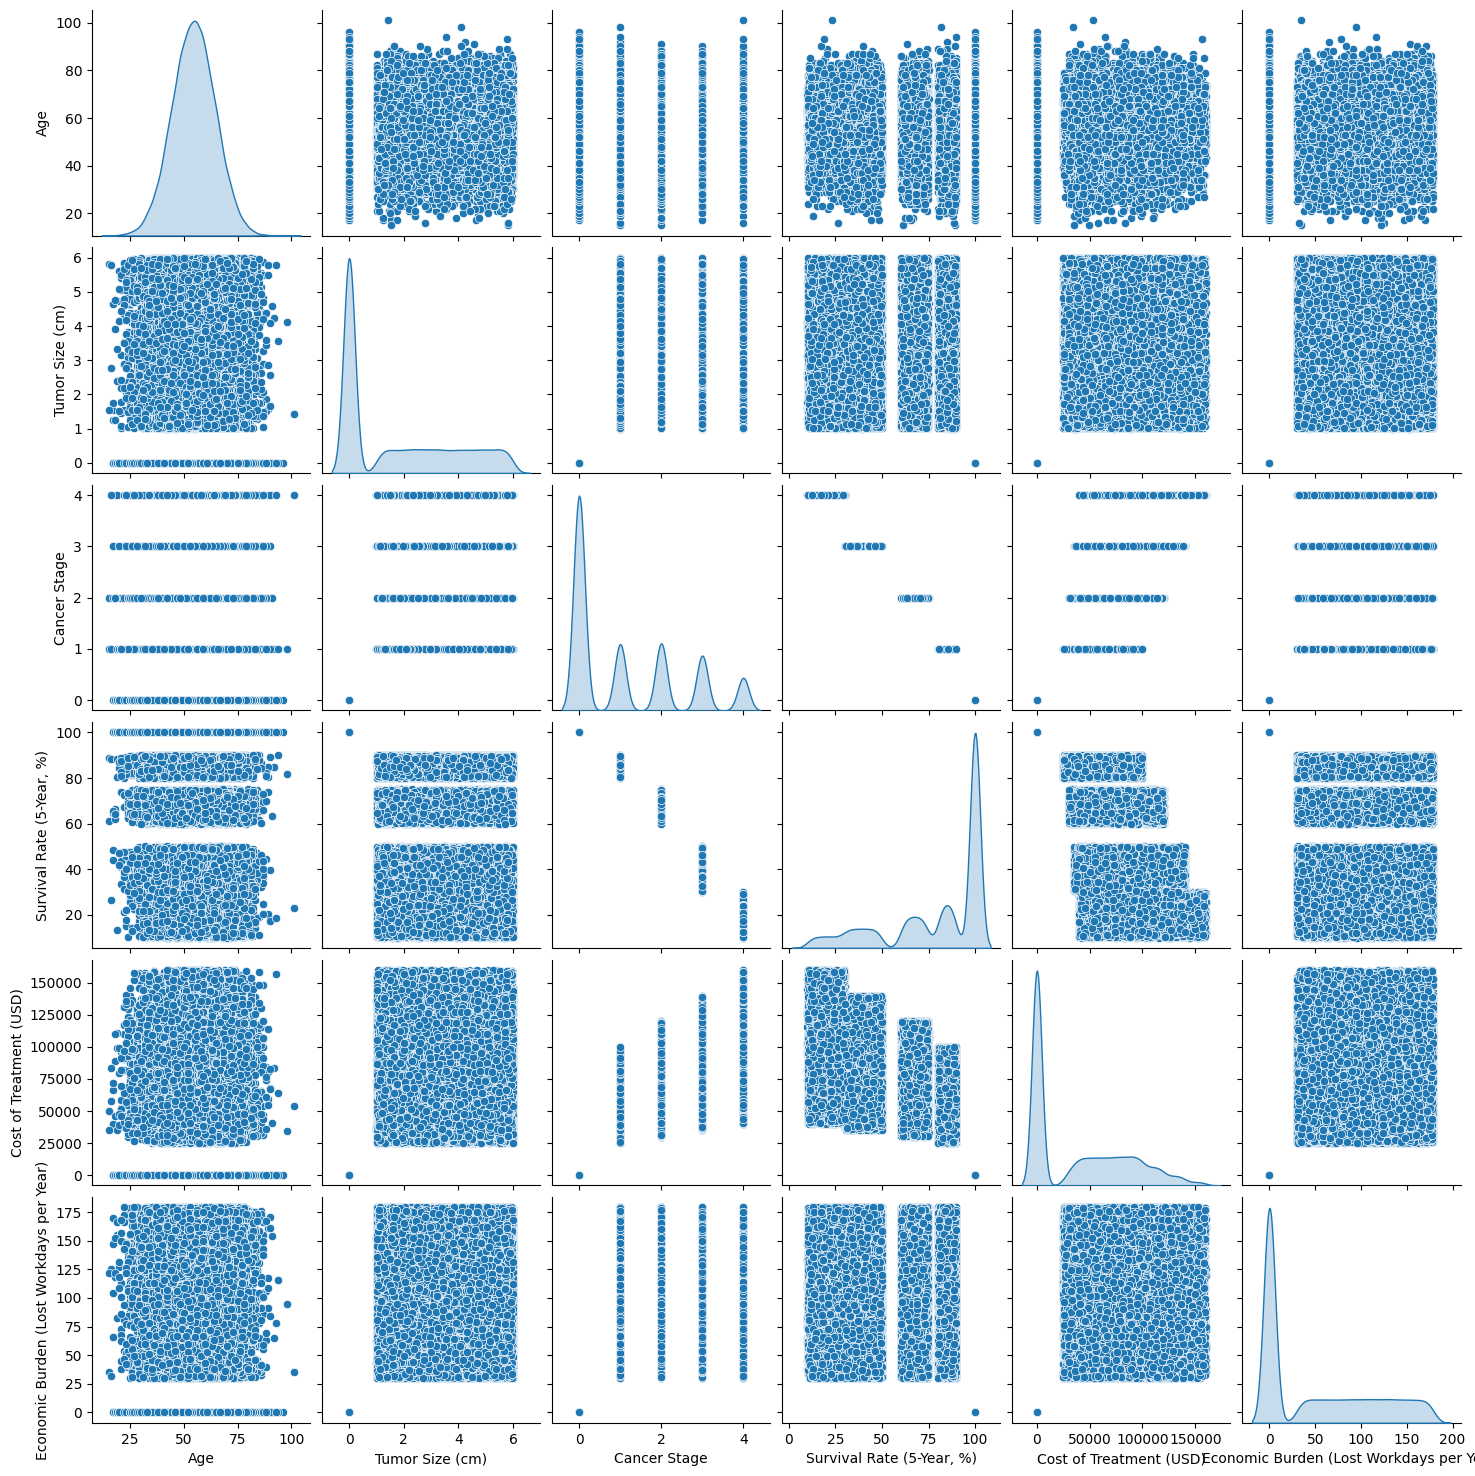

In [22]:
sns.pairplot(df[num_cols],kind='scatter',diag_kind='kde')
plt.show()

In [23]:
df.to_csv('cleaned_dataset.csv', index=False)

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,South Africa,68,Male,No,No,No,No,No,Yes,High,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes
